## 2 Preprocesamiento de los datos

### 2.1 Importar librerías

In [1]:
# Importar todas las librerías necesarias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from functools import reduce
import re

import warnings
warnings.filterwarnings('ignore')

print('Todas las librerías se importaron correctamente')

Todas las librerías se importaron correctamente


### 2.2 Cargar y leer los datos

Disponemos de cuatro conjuntos de datos que serán cargados y almacenados en variables individuales para su posterior análisis.

In [2]:
# Almacenar datos en diferentes variables

try:
    contract, internet, personal, phone = pd.read_csv('/datasets/final_provider/contract.csv'),\
                                            pd.read_csv('/datasets/final_provider/internet.csv'),\
                                            pd.read_csv('/datasets/final_provider/personal.csv'),\
                                            pd.read_csv('/datasets/final_provider/phone.csv')

except FileNotFoundError:
    print("Advertencia: no se encontraron los archivos en la ruta esperada. Se intentará cargar desde el directorio local.")
    contract, internet, personal, phone = pd.read_csv('contract.csv'),\
                                            pd.read_csv('internet.csv'),\
                                            pd.read_csv('personal.csv'),\
                                            pd.read_csv('phone.csv')

In [3]:
# Visualizar una muestra de cada tabla

tables = {
    'contract': contract,
    'internet': internet,
    'personal': personal,
    'phone': phone
}

for table_name, table_data in tables.items():
    print(f"\nData sample: `{table_name}`")
    display(table_data.head())
    print('=' * 100)


Data sample: `contract`


,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65



Data sample: `internet`


,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No



Data sample: `personal`


,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No



Data sample: `phone`


,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


In [4]:
# Verificar las dimensiones de los cuatro conjuntos de datos

shapes = [contract, internet, personal, phone]
shape_names = ['contract', 'internet', 'personal', 'phone']

for dataset, name in zip(shapes, shape_names):
    print(f"{name}.shape: {dataset.shape}")

contract.shape: (7043, 8)
internet.shape: (5517, 8)
personal.shape: (7043, 5)
phone.shape: (6361, 2)


**Siguiente paso:**

De acuerdo con la información proporcionada, las cuatro tablas contienen una columna común llamada <code>customerID</code>, la cual representa un identificador único asignado a cada cliente. Para facilitar el análisis, combinaremos estas cuatro tablas en un único DataFrame utilizando esta columna como clave.

Dado que los tamaños de las tablas no son iguales, y que <code>contract</code> y <code>personal</code> presentan la mayor cantidad de filas, emplearemos una fusión externa (outer join). Esto nos permitirá conservar toda la información disponible, incluso si hay registros que no estén presentes en todas las tablas.

In [5]:
# Lista de tablas a unir
tables = [contract, internet, personal, phone]

# Fusionar los conjuntos de datos con outer join basada en 'customerID' 
df = reduce(lambda left, right: pd.merge(left, right, on='customerID', how='outer'), tables)

# Mostrar las primeras filas del DataFrame resultante para verificar la fusión
df.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,gender,SeniorCitizen,Partner,Dependents,MultipleLines
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85,DSL,No,Yes,No,No,No,No,Female,0,Yes,No,NaN
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5,DSL,Yes,No,Yes,No,No,No,Male,0,No,No,No
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15,DSL,Yes,Yes,No,No,No,No,Male,0,No,No,No
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75,DSL,Yes,No,Yes,Yes,No,No,Male,0,No,No,NaN
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65,Fiber optic,No,No,No,No,No,No,Female,0,No,No,No


**Verificación del tamaño del DataFrame:**

Después de fusionar las tablas, es importante revisar cuántas filas y columnas resultaron para asegurarnos de que se integraron todos los datos esperados.

In [6]:
# Mostrar el número de filas y columnas del DataFrame fusionado

print("Tamaño del DataFrame fusionado (filas, columnas):", df.shape)

Tamaño del DataFrame fusionado (filas, columnas): (7043, 20)


**Verificación de nombres de columnas:** 

Se revisan los nombres de las columnas resultantes para asegurarse de que todas las variables fueron integradas correctamente tras la fusión, y para identificar posibles duplicados o conflictos generados por columnas con nombres similares.

In [7]:
# Verificar los nombres de todas las columnas del DataFrame fusionado

print("Columnas en el DataFrame fusionado:")
print(df.columns)

Columnas en el DataFrame fusionado:
Index(['customerID', 'BeginDate', 'EndDate', 'Type', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'MultipleLines'],
      dtype='object')


A continuación, se presenta una breve descripción del significado de cada columna del conjunto de datos:

#### Identificación del cliente
1. `customerID`: ID único asignado a cada cliente.

#### Fechas de contrato
2. `BeginDate`: Fecha de inicio del uso del servicio.
3. `EndDate`: Fecha de finalización del uso del servicio.

#### Información del contrato y facturación
4. `Type`: Tipo de contrato (mensual, anual, bianual).
5. `PaperlessBilling`: Indica si se utiliza facturación electrónica (`Yes` / `No`).
6. `PaymentMethod`: Método de pago utilizado por el cliente.
7. `MonthlyCharges`: Cargos mensuales por el servicio.
8. `TotalCharges`: Cargos acumulados durante todo el periodo de servicio.

#### Servicios contratados
9. `InternetService`: Tipo de servicio de internet contratado.
10. `OnlineSecurity`: Indica si se contrató seguridad en línea (`Yes` / `No`).
11. `OnlineBackup`: Indica si se contrató respaldo en línea (`Yes` / `No`).
12. `DeviceProtection`: Indica si se contrató protección del dispositivo (`Yes` / `No`).
13. `TechSupport`: Indica si se contrató soporte técnico (`Yes` / `No`).
14. `StreamingTV`: Indica si se contrató servicio de TV en streaming (`Yes` / `No`).
15. `StreamingMovies`: Indica si se contrató servicio de películas en streaming (`Yes` / `No`).
16. `MultipleLines`: Indica si el cliente tiene múltiples líneas telefónicas (`Yes` / `No`).

#### Información personal del cliente
17. `gender`: Género del cliente (`Male` / `Female`).
18. `SeniorCitizen`: Indica si el cliente es una persona mayor (`1` = Sí, `0` = No).
19. `Partner`: Indica si el cliente tiene pareja (`Yes` / `No`).
20. `Dependents`: Indica si el cliente tiene personas dependientes (`Yes` / `No`).

In [8]:
# Verificar información general del DataFrame

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   InternetService   5517 non-null   object 
 9   OnlineSecurity    5517 non-null   object 
 10  OnlineBackup      5517 non-null   object 
 11  DeviceProtection  5517 non-null   object 
 12  TechSupport       5517 non-null   object 
 13  StreamingTV       5517 non-null   object 
 14  StreamingMovies   5517 non-null   object 
 15  gender            7043 non-null   object 
 16  SeniorCitizen     7043 non-null   int64  


In [9]:
# Mostrar la cantidad de valores faltantes por columna, ordenados de mayor a menor

missing_values = df.isna().sum().sort_values(ascending=False)
print("Valores faltantes por columna:")
print(missing_values)

Valores faltantes por columna:
OnlineBackup        1526
InternetService     1526
StreamingMovies     1526
StreamingTV         1526
TechSupport         1526
DeviceProtection    1526
OnlineSecurity      1526
MultipleLines        682
TotalCharges           0
MonthlyCharges         0
BeginDate              0
PaymentMethod          0
PaperlessBilling       0
Type                   0
EndDate                0
gender                 0
SeniorCitizen          0
Partner                0
Dependents             0
customerID             0
dtype: int64


In [10]:
# Obtener una descripción estadística de las variables numéricas del DataFrame

df.describe()

,MonthlyCharges,SeniorCitizen
count,7043.000000,7043.000000
mean,64.761692,0.162147
std,30.090047,0.368612
min,18.250000,0.000000
25%,35.500000,0.000000
50%,70.350000,0.000000
75%,89.850000,0.000000
max,118.750000,1.000000


In [11]:
# Verificar la cantidad de registros duplicados en el DataFrame

df.duplicated().sum()

0

**Resultados del análisis exploratorio inicial:**

El conjunto de datos fusionado consta de 7,043 filas y 20 columnas.

Algunas columnas provenientes de las tablas `internet` y `phone` presentan valores faltantes, debido a que dichas tablas contenían menos registros.

Se identificó que los nombres de las columnas no siguen una escritura uniforme; se estandarizarán para mantener la coherencia del análisis.

No se encontraron registros duplicados en el conjunto de datos.

La mayoría de las columnas son de tipo `object`. Entre ellas, `BeginDate` y `EndDate` deberán ser convertidas a tipo `datetime`, y `TotalCharges` a tipo `float64`.

Solo dos columnas son actualmente numéricas: `MonthlyCharges` y `SeniorCitizen`.

La columna `MonthlyCharges` representa el costo mensual del servicio por cliente. Tiene un promedio de 64.76 USD y una mediana de 70.35 USD. La diferencia entre estos valores podría indicar la presencia de valores atípicos.

La columna `SeniorCitizen` contiene únicamente dos valores: 1 para indicar que el cliente es una persona mayor, y 0 para indicar que no lo es.

Varias columnas con valores tipo `Sí/No` deben ser transformadas en variables binarias, de forma similar a la columna `SeniorCitizen`.

La columna `TotalCharges` no se muestra correctamente en el resumen estadístico debido a su tipo de dato actual (`object`).

La variable objetivo para el modelo de clasificación será `EndDate`, la cual indica el estado del cliente (activo o inactivo). Para este propósito, se transformará en una variable binaria, donde un valor represente la cancelación del servicio y otro la permanencia.

### 2.3 Depuración y estandarizacón del dataset

#### 2.3.1 Normalización de etiquetas de columnas

In [12]:
# Crear una lista con los nombres originales de las columnas
old_columns = ['customerID', 'BeginDate', 'EndDate', 'Type', 'PaperlessBilling',
               'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'InternetService',
               'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
               'StreamingTV', 'StreamingMovies', 'gender', 'SeniorCitizen',
               'Partner', 'Dependents', 'MultipleLines']

# Crear una nueva lista con los nombres transformados
new_columns = []

for column in old_columns:
    # Separar las palabras compuestas usando snake_case, excepto en sufijos como 'ID' y 'TV'
    if not column.endswith('ID') and not column.endswith('TV'):
        column = re.sub(r'(?<!^)(?=[A-Z])', '_', column)
    
    new_columns.append(column)

# Convertir todos los nombres de columna a minúsculas
new_columns = [column.lower() for column in new_columns]

# Asignar los nuevos nombres al DataFrame
df.columns = new_columns

# Verificar los nombres de columna actualizados
df.columns

Index(['customerid', 'begin_date', 'end_date', 'type', 'paperless_billing',
       'payment_method', 'monthly_charges', 'total_charges',
       'internet_service', 'online_security', 'online_backup',
       'device_protection', 'tech_support', 'streamingtv', 'streaming_movies',
       'gender', 'senior_citizen', 'partner', 'dependents', 'multiple_lines'],
      dtype='object')

Todos los nombres de columnas fueron uniformizados exitosamente.

#### 2.3.2 Conversión de tipos de datos

#### Transformaciones necesarias en el conjunto de datos

Con base en el análisis exploratorio inicial, se identificaron varias columnas cuyo tipo de dato debe ajustarse para que sean compatibles con las siguientes etapas del análisis:

- `begin_date` y `end_date`: deben convertirse de tipo `object` a tipo `datetime`, para permitir cálculos de duración o comparaciones temporales.
- `total_charges`: debe convertirse de tipo `object` a tipo `float`, ya que representa un valor numérico acumulado.
- Varias columnas categóricas con valores `"Yes"` y `"No"` serán transformadas a variables numéricas (`1` y `0`) para facilitar su uso en modelos de machine learning. Esto incluye:  
  `online_security`, `online_backup`, `device_protection`, `tech_support`, `streamingtv`, `streaming_movies`, `partner`, `dependents` y `multiple_lines`.

Estas transformaciones forman parte de la limpieza del conjunto de datos y son necesarias antes de proceder con la codificación, imputación de valores faltantes y modelado predictivo.

**Columnas `begin_date` y `end_date`**

In [13]:
# Revisar los valores únicos en la columna 'begin_date' para verificar su formato

df['begin_date'].unique()

array(['2020-01-01', '2017-04-01', '2019-10-01', '2016-05-01',
       '2019-09-01', '2019-03-01', '2018-04-01', '2019-04-01',
       '2017-07-01', '2014-12-01', '2019-01-01', '2018-10-01',
       '2015-04-01', '2015-09-01', '2018-01-01', '2014-05-01',
       '2015-10-01', '2014-03-01', '2018-05-01', '2019-11-01',
       '2019-02-01', '2016-01-01', '2017-08-01', '2015-12-01',
       '2014-02-01', '2018-06-01', '2019-12-01', '2017-11-01',
       '2019-06-01', '2016-04-01', '2017-02-01', '2018-12-01',
       '2014-04-01', '2018-09-01', '2014-11-01', '2016-07-01',
       '2015-02-01', '2018-07-01', '2014-08-01', '2016-03-01',
       '2018-08-01', '2014-10-01', '2015-06-01', '2016-08-01',
       '2019-05-01', '2017-03-01', '2016-02-01', '2017-09-01',
       '2014-09-01', '2017-12-01', '2016-12-01', '2017-06-01',
       '2015-05-01', '2016-10-01', '2016-09-01', '2019-08-01',
       '2019-07-01', '2017-05-01', '2017-10-01', '2014-07-01',
       '2018-03-01', '2015-01-01', '2018-11-01', '2015-

In [14]:
# Revisar los valores únicos en la columna 'end_date' para verificar su formato y contenido

df['end_date'].unique()

array(['No', '2019-12-01 00:00:00', '2019-11-01 00:00:00',
       '2019-10-01 00:00:00', '2020-01-01 00:00:00'], dtype=object)

Los datos en las columnas `begin_date` y `end_date` incluyen información de fecha completa (día, mes y año), pero únicamente se utilizarán el mes y el año, ya que el día no aporta valor analítico en este caso.

Se observó que la columna `end_date` contiene significativamente menos valores que `begin_date`, lo cual indica que solo una parte de los clientes han finalizado su servicio. De hecho, `end_date` presenta únicamente 5 valores únicos, correspondientes a 4 meses distintos (de octubre de 2019 a enero de 2020), mientras que `begin_date` abarca registros desde octubre de 2013 hasta febrero de 2020.

Dado que la columna `end_date` funciona como indicador de cancelación, se utilizará para crear una nueva variable llamada churn:

* 1 indica que el cliente canceló el servicio (existe una fecha en `end_date`).

* 0 indica que el cliente sigue activo (valor nulo o "No" en `end_date`).

Una vez creada la variable churn, la columna `end_date` será eliminada del conjunto de datos, ya que ha cumplido su función como fuente para definir la variable objetivo del modelo.

In [15]:
# Convertir la columna 'begin_date' a tipo datetime y extraer solo el mes y el año

df['begin_date'] = pd.to_datetime(df['begin_date']).dt.to_period('M')

In [16]:
# Mostrar los primeros valores de la columna 'begin_date' después de la conversión

df['begin_date'].head()

0    2020-01
1    2017-04
2    2019-10
3    2016-05
4    2019-09
Name: begin_date, dtype: period[M]

In [17]:
# Crear la variable objetivo 'churn' a partir de 'end_date'
# Asignar 0 a clientes activos (valor 'No') y 1 a clientes que cancelaron (cualquier otro valor)

df['churn'] = df['end_date'].apply(lambda x: 0 if x == 'No' else 1)

# Eliminar la columna original 'end_date', ya que fue reemplazada por 'churn'

df = df.drop('end_date', axis=1)

In [18]:
# Mostrar los primeros valores de la columna 'churn' para verificar la transformación

df['churn'].head()

0    0
1    0
2    1
3    0
4    1
Name: churn, dtype: int64

Los datos y su tipo se cambiaron exitosamente.

**Columna `total_charges`**

In [19]:
# Revisar valores únicos en la columna 'total_charges'

df['total_charges'].unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

Parece que los datos pueden convertirse sin ningún problema. 

In [20]:
# Convertir la columna 'total_charges' a tipo numérico (float), 
# convirtiendo a NaN los valores no convertibles

df['total_charges'] = pd.to_numeric(df['total_charges'], errors='coerce')

In [21]:
# Mostrar los primeros valores de la columna 'total_charges' 

df['total_charges'].head()

0      29.85
1    1889.50
2     108.15
3    1840.75
4     151.65
Name: total_charges, dtype: float64

El tipo de datos se cambió exitosamente a float64.

**Columnas categóricas binarias**

En el conjunto de datos existen varias columnas categóricas que contienen únicamente los valores `"Sí"` y `"No"`. Para facilitar el análisis y el posterior modelado, se realizará una conversión de estos valores a formato numérico binario, donde:

- `1` representa `"Sí"`.
- `0` representa `"No"`.

Las columnas que serán transformadas con esta regla son:

- `online_security`
- `online_backup`
- `device_protection`
- `tech_support`
- `streamingtv`
- `streaming_movies`
- `partner`
- `dependents`
- `multiple_lines`

Esta transformación permitirá un manejo más eficiente de los datos y la integración directa en algoritmos de machine learning que requieren variables numéricas.

In [22]:
# Revisar los valores únicos en columnas binarias tipo "Sí"/"No"
# (las columnas 'partner', 'dependents' y 'paperless_billing' se analizarán por separado)

unique_values = pd.DataFrame({
    'online_security': df['online_security'].unique(),
    'online_backup': df['online_backup'].unique(),
    'device_protection': df['device_protection'].unique(),
    'tech_support': df['tech_support'].unique(),
    'streamingtv': df['streamingtv'].unique(),
    'streaming_movies': df['streaming_movies'].unique(),
    'multiple_lines': df['multiple_lines'].unique()
})

# Transponer para visualizar como tabla

unique_values.T

,0,1,2
online_security,No,Yes,NaN
online_backup,Yes,No,NaN
device_protection,No,Yes,NaN
tech_support,No,Yes,NaN
streamingtv,No,Yes,NaN
streaming_movies,No,Yes,NaN
multiple_lines,NaN,No,Yes


In [23]:
# Verificar los valores únicos en las columnas 'partner', 'dependents' y 'paperless_billing'
# estas deberían contener únicamente los valores 'Yes' y 'No'

unique_values_2 = pd.DataFrame({
    'partner': df['partner'].unique(),
    'dependents': df['dependents'].unique(),
    'paperless_billing': df['paperless_billing'].unique()
}).T

unique_values_2

,0,1
partner,Yes,No
dependents,No,Yes
paperless_billing,Yes,No


**Conversión de valores categóricos y tratamiento de valores nulos**

Durante el análisis exploratorio se observó que los valores NaN en algunas columnas categóricas (como `online_security`, `streamingtv`, etc.) provienen del hecho de que el conjunto de datos original de Internet solo incluye a los clientes que efectivamente usan este servicio. Por lo tanto, los registros con valores faltantes (`NaN`) en estas columnas corresponden a clientes que no tienen contratado el servicio de Internet, y se pueden considerar como equivalentes a "No".

Para simplificar el análisis y preparar los datos para el modelado, se realizará la siguiente transformación en las columnas categóricas:

`Yes` se convertirá a 1.

`No` y `NaN` se convertirán a 0.

Esta decisión permitirá un tratamiento más uniforme de las variables y facilitará su uso en modelos de clasificación.

In [24]:
# Convertir valores categóricos: 'Yes' a 1, 'No' y NaN a 0 en las columnas indicadas
# Cambiar el tipo de dato de object a entero (int)

# Definir la lista de columnas a transformar
cols_to_convert = ['online_security', 'online_backup', 'device_protection',
                   'tech_support', 'streamingtv', 'streaming_movies',
                   'partner', 'dependents', 'multiple_lines', 'paperless_billing']

# Reemplazar valores y convertir tipo de dato
df[cols_to_convert] = df[cols_to_convert].replace({'Yes': 1, 'No': 0, np.nan: 0})
df[cols_to_convert] = df[cols_to_convert].astype(int)

# Verificar los primeros valores después de la transformación
df[cols_to_convert].head()

,online_security,online_backup,device_protection,tech_support,streamingtv,streaming_movies,partner,dependents,multiple_lines,paperless_billing
0,0,1,0,0,0,0,1,0,0,1
1,1,0,1,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,1
3,1,0,1,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1


In [25]:
# Verificar nuevamente el tipo de dato de cada columna 

df.dtypes

customerid              object
begin_date           period[M]
type                    object
paperless_billing        int64
payment_method          object
monthly_charges        float64
total_charges          float64
internet_service        object
online_security          int64
online_backup            int64
device_protection        int64
tech_support             int64
streamingtv              int64
streaming_movies         int64
gender                  object
senior_citizen           int64
partner                  int64
dependents               int64
multiple_lines           int64
churn                    int64
dtype: object

In [26]:
# Visualizar las primeras filas del conjunto de datos para verificar el estado actual

df.head()

,customerid,begin_date,type,paperless_billing,payment_method,monthly_charges,total_charges,internet_service,online_security,online_backup,device_protection,tech_support,streamingtv,streaming_movies,gender,senior_citizen,partner,dependents,multiple_lines,churn
0,7590-VHVEG,2020-01,Month-to-month,1,Electronic check,29.85,29.85,DSL,0,1,0,0,0,0,Female,0,1,0,0,0
1,5575-GNVDE,2017-04,One year,0,Mailed check,56.95,1889.50,DSL,1,0,1,0,0,0,Male,0,0,0,0,0
2,3668-QPYBK,2019-10,Month-to-month,1,Mailed check,53.85,108.15,DSL,1,1,0,0,0,0,Male,0,0,0,0,1
3,7795-CFOCW,2016-05,One year,0,Bank transfer (automatic),42.30,1840.75,DSL,1,0,1,1,0,0,Male,0,0,0,0,0
4,9237-HQITU,2019-09,Month-to-month,1,Electronic check,70.70,151.65,Fiber optic,0,0,0,0,0,0,Female,0,0,0,0,1


Se han ajustado todos los tipos de datos y las columnas que contienen los valores 'Sí' y 'No' también se han cambiado a 1 y 0.

#### 2.3.3 Manejo de datos faltantes

La mayoría de los valores faltantes se resolvieron al cambiar el tipo de columna y convertir los valores "Sí" y "No". Revisemos las columnas que aún tienen valores faltantes.

In [27]:
# Verificar la cantidad de valores faltantes (NaN) 

df.isna().sum()

customerid              0
begin_date              0
type                    0
paperless_billing       0
payment_method          0
monthly_charges         0
total_charges          11
internet_service     1526
online_security         0
online_backup           0
device_protection       0
tech_support            0
streamingtv             0
streaming_movies        0
gender                  0
senior_citizen          0
partner                 0
dependents              0
multiple_lines          0
churn                   0
dtype: int64

Solo dos columnas, `internet_service` y `total_charges`, presentan valores faltantes tras el preprocesamiento de datos.

In [28]:
# Revisar los valores únicos en la columna 'internet_service' 

df['internet_service'].unique()

array(['DSL', 'Fiber optic', nan], dtype=object)

In [29]:
# Verificar la cantidad de valores únicos en la columna 'total_charges'

df['total_charges'].nunique()

6530

In [30]:
# Mostrar todas las filas donde 'total_charges' tiene valores faltantes (NaN)

df[df['total_charges'].isnull()]

,customerid,begin_date,type,paperless_billing,payment_method,monthly_charges,total_charges,internet_service,online_security,online_backup,device_protection,tech_support,streamingtv,streaming_movies,gender,senior_citizen,partner,dependents,multiple_lines,churn
488,4472-LVYGI,2020-02,Two year,1,Bank transfer (automatic),52.55,NaN,DSL,1,0,1,1,1,0,Female,0,1,1,0,0
753,3115-CZMZD,2020-02,Two year,0,Mailed check,20.25,NaN,NaN,0,0,0,0,0,0,Male,0,0,1,0,0
936,5709-LVOEQ,2020-02,Two year,0,Mailed check,80.85,NaN,DSL,1,1,1,0,1,1,Female,0,1,1,0,0
1082,4367-NUYAO,2020-02,Two year,0,Mailed check,25.75,NaN,NaN,0,0,0,0,0,0,Male,0,1,1,1,0
1340,1371-DWPAZ,2020-02,Two year,0,Credit card (automatic),56.05,NaN,DSL,1,1,1,1,1,0,Female,0,1,1,0,0
3331,7644-OMVMY,2020-02,Two year,0,Mailed check,19.85,NaN,NaN,0,0,0,0,0,0,Male,0,1,1,0,0
3826,3213-VVOLG,2020-02,Two year,0,Mailed check,25.35,NaN,NaN,0,0,0,0,0,0,Male,0,1,1,1,0
4380,2520-SGTTA,2020-02,Two year,0,Mailed check,20.00,NaN,NaN,0,0,0,0,0,0,Female,0,1,1,0,0
5218,2923-ARZLG,2020-02,One year,1,Mailed check,19.70,NaN,NaN,0,0,0,0,0,0,Male,0,1,1,0,0
6670,4075-WKNIU,2020-02,Two year,0,Mailed check,73.35,NaN,DSL,0,1,1,1,1,0,Female,0,1,1,1,0


**Pasos para la finalización del preprocesamiento**

*Columna `internet_service`:*

* La columna `internet_service` presenta únicamente tres valores únicos: DSL, Fiber optic y NaN.

* Los valores NaN se originan debido al proceso de fusión de los conjuntos de datos, específicamente en la tabla `internet`.

* Estos valores faltantes indican que el cliente no cuenta con servicio de internet contratado.

* Por lo tanto, se reemplazará el valor NaN por la categoría `no_internet`, para reflejar explícitamente esta condición.

*Columna `total_charges`:*

* Existen únicamente 11 filas con valores faltantes (NaN) en la columna `total_charges`.

* Dado que son pocas observaciones, se considera seguro eliminar estas filas sin comprometer la representatividad ni la calidad del conjunto de datos.

In [31]:
# Reemplazar los valores faltantes en la columna 'internet_service' por 'no _internet'

df['internet_service'] = df['internet_service'].fillna('no_internet')

In [32]:
# Eliminar las filas que contienen valores faltantes en la columna 'total_charges'

df.dropna(subset=['total_charges'], inplace=True)

In [33]:
# Verificar nuevamente si quedan valores faltantes en el conjunto de datos

df.isna().sum()

customerid           0
begin_date           0
type                 0
paperless_billing    0
payment_method       0
monthly_charges      0
total_charges        0
internet_service     0
online_security      0
online_backup        0
device_protection    0
tech_support         0
streamingtv          0
streaming_movies     0
gender               0
senior_citizen       0
partner              0
dependents           0
multiple_lines       0
churn                0
dtype: int64

Con estas acciones, se han resuelto todos los valores faltantes presentes en el conjunto de datos.

## 3 Análisis exploratorio de datos

Tras completar el preprocesamiento, ahora contamos con un conjunto de datos limpio y listo para su análisis.

En esta sección, realizaremos un análisis exploratorio de datos (EDA) con el objetivo de identificar los factores que influyen en la tasa de abandono de los clientes de *Interconnect*.

Comenzaremos examinando la correlación entre las diferentes variables del conjunto de datos y la variable objetivo (`churn`), que indica si un cliente ha cancelado el servicio o permanece activo.

In [34]:
# Seleccionar solo columnas numéricas
numeric_df = df.select_dtypes(include='number')

# Calcular la correlación con la columna 'churn'
correlaciones = numeric_df.corr()['churn'].sort_values(ascending=False)

print(correlaciones)

churn                1.000000
monthly_charges      0.192858
paperless_billing    0.191454
senior_citizen       0.150541
streamingtv          0.063254
streaming_movies     0.060860
multiple_lines       0.040033
device_protection   -0.066193
online_backup       -0.082307
partner             -0.149982
dependents          -0.163128
tech_support        -0.164716
online_security     -0.171270
total_charges       -0.199484
Name: churn, dtype: float64


**Resultados del análisis de correlación** 

En general, la correlación entre las variables del conjunto de datos y la variable objetivo `churn` (abandono) es relativamente baja, lo que indica que no hay una sola variable que por sí sola explique el abandono, aunque sí se observan algunos patrones relevantes.

**Correlación positiva**

Algunas variables presentan una correlación positiva moderada con `churn`, lo que sugiere que, a mayor valor de la variable, mayor probabilidad de abandono:

- `monthly_charges` (0.19): Los clientes con cargos mensuales más altos tienden a abandonar con mayor frecuencia.

- `paperless_billing` (0.19): El uso de facturación electrónica se asocia con una mayor tasa de abandono.

- `senior_citizen`  (0.15): Los adultos mayores tienen una probabilidad ligeramente más alta de abandonar el servicio.

**Correlación negativa**

Otras variables muestran una correlación negativa moderada, lo que indica que su presencia o valores más altos se asocian con menor abandono:

- `total_charges` (−0.20): Clientes con cargos acumulados más altos (es decir, que llevan más tiempo con la empresa) tienen menor probabilidad de abandonar.

- `online_security` (−0.17) y `tech_support` (−0.16): Los servicios de seguridad en línea y soporte técnico están asociados con mayor retención.

- `dependents` (−0.16) y `partner` (−0.15): Clientes con pareja o dependientes tienden a permanecer más tiempo en el servicio.


**Conclusión preliminar**

Estos hallazgos sugieren que factores como el nivel de servicio contratado, el contexto familiar y el acceso a servicios de soporte tienen un impacto en la decisión de los clientes de continuar o cancelar el servicio. Estos hallazgos preliminares se explorarán con mayor detalle en las siguientes etapas del análisis, a través de visualizaciones y técnicas multivariadas.

**Preparación de funciones auxiliares**

Como se realizarán varios análisis exploratorios sobre distintas columnas, se definirá una función personalizada que permita simplificar y automatizar este proceso de manera iterativa.

In [35]:
# Definir una función para analizar la distribución de valores en una columna y mostrar un gráfico circular
def analyze_column(column):
    """
    Analiza la distribución de valores en una columna del DataFrame 'df'.

    Muestra un DataFrame con los conteos absolutos y porcentajes de cada categoría,
    seguido de un gráfico circular que representa visualmente la distribución.

    Parámetros:
    column (str): El nombre de la columna a analizar.
    """
    # Calcular conteos y porcentajes
    value_counts = df[column].value_counts()
    percentages = (value_counts / len(df)) * 100

    # Crear DataFrame con resultados
    data = pd.DataFrame({'Frecuencia absoluta': value_counts, 'Porcentaje': percentages.map('{:.2f}%'.format)})

    # Mostrar tabla
    display(data)

    # Graficar gráfico circular
    plt.pie(value_counts, labels=value_counts.index, autopct='%.1f%%')
    plt.title(f'Distribución de {column}')
    plt.show()


In [36]:
def analyze_churn_rate(column):
    """
    Calcula y visualiza la tasa de abandono (churn) en función de una columna categórica.

    Para cada categoría dentro de la columna especificada, se calcula el número de clientes
    que abandonaron y los que permanecen activos. Luego, se representa esta información en
    un gráfico de barras y se añade una columna con el porcentaje de abandono.

    Parámetros:
    column (str): Nombre de la columna categórica a analizar.

    Retorna:
    pd.DataFrame: Un DataFrame con el conteo de clientes por clase de abandono (0 o 1)
                  y una columna adicional con el porcentaje de abandono.
    """

    # Calcular la tasa de abandono por categoría
    churn_rate = df.groupby(column)['churn'].value_counts().unstack(fill_value=0)

    # Añadir columna con el porcentaje de abandono
    churn_rate['churn_rate'] = (churn_rate[1] / churn_rate.sum(axis=1) * 100).round(2).astype(str) + '%'
    
    # Crear el gráfico de barras
    churn_rate[[0, 1]].plot(kind='bar', stacked=False)

    # Etiquetas y título del gráfico
    plt.title(f'Tasa de abandono según {column}')
    plt.xlabel(column)
    plt.ylabel('Cantidad de clientes')

    # Leyenda
    plt.legend(title='Abandono', loc='upper right')
    
    # Rotar etiquetas del eje x
    plt.gca().set_xticklabels(churn_rate.index, rotation=45, ha='right')

    # Mostrar gráfico
    plt.show()
    
    # Retornar la tabla con los datos calculados
    return churn_rate

### 3.1 Correlación positiva

#### 3.1.1 Columna `monthly_charges`

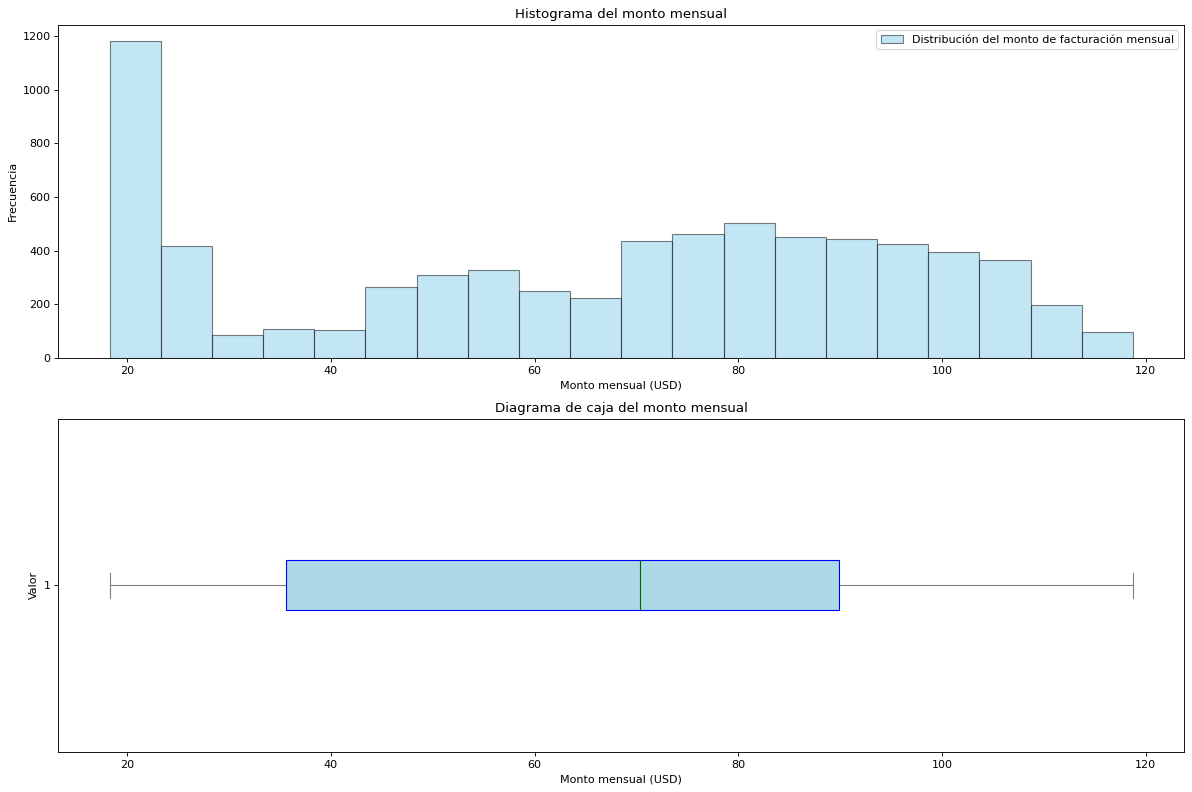

In [37]:
# Visualizar la distribución de la columna `monthly_charges` con media y mediana

plt.figure(figsize=(15, 10), dpi=80)

# Histograma 
plt.subplot(2, 1, 1)
plt.hist(df['monthly_charges'], bins=20, alpha=0.5, label='Distribución del monto de facturación mensual', color='skyblue', edgecolor='black')

plt.xlabel('Monto mensual (USD)')
plt.ylabel('Frecuencia')
plt.legend(loc='upper right')
plt.title('Histograma del monto mensual')

# Diagrama de caja (boxplot)
plt.subplot(2, 1, 2)
plt.boxplot(df['monthly_charges'], vert=False, patch_artist=True,
            boxprops=dict(facecolor='lightblue', color='blue'),
            medianprops=dict(color='darkgreen'),
            whiskerprops=dict(color='gray'),
            capprops=dict(color='gray'),
            flierprops=dict(markerfacecolor='red', marker='o', markersize=5))

plt.xlabel('Monto mensual (USD)')
plt.ylabel('Valor')
plt.title('Diagrama de caja del monto mensual')

plt.tight_layout()
plt.show()

**Resultados**

- La distribución de los datos se concentra en los valores de facturación más bajos, principalmente alrededor de los 20 USD.
- La frecuencia disminuye progresivamente conforme aumentan los montos, aunque se observa un repunte leve en valores superiores a 70 USD.

A continuación, crearemos una nueva columna que agrupe los datos de la variable `monthly_charges` en rangos definidos. Esto permitirá analizar patrones de comportamiento y cancelación de clientes según el nivel de facturación mensual.

In [38]:
# Crear una nueva columna 'charge_category' que clasifica los cargos mensuales en categorías
# según rangos definidos, para facilitar el análisis segmentado por niveles de facturación.
df['charge_category'] = pd.cut(
    df['monthly_charges'],
    bins=[0, 30, 50, 70, 90, 120],
    labels=['bajo', 'bajo-medio', 'medio', 'medio-alto', 'alto'],
    right=False
)

,Frecuencia absoluta,Porcentaje
medio-alto,1845,26.24%
alto,1744,24.80%
bajo,1647,23.42%
medio,1155,16.42%
bajo-medio,641,9.12%


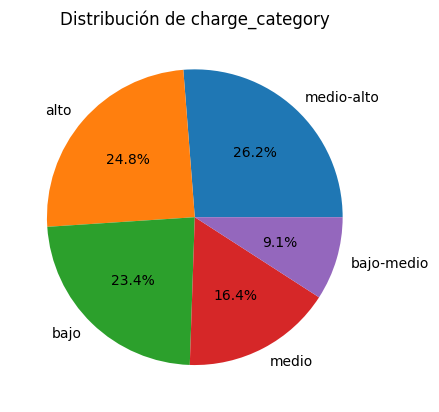

In [39]:
# Calcular y mostrar la distribución de frecuencias de la columna categórica 'charge_category'

analyze_column('charge_category')

**Resultados:**

La distribución de los datos se concentra principalmente en las categorías media-alta, alta y baja, mientras que las categorías media y media-baja presentan una representación relativamente menor.

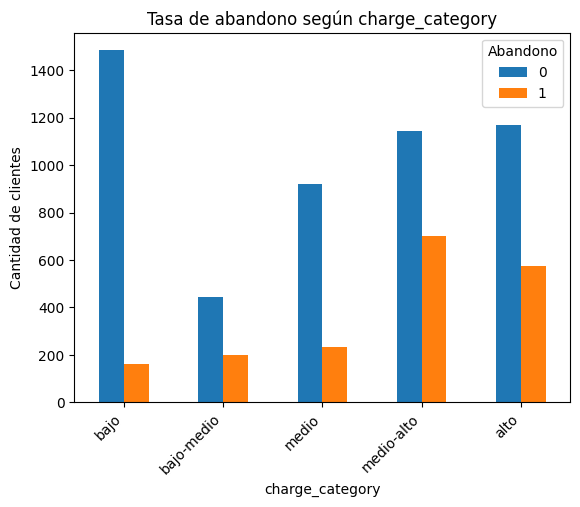

churn,0,1,churn_rate
charge_category,,,
bajo,1485,162,9.84%
bajo-medio,442,199,31.05%
medio,921,234,20.26%
medio-alto,1144,701,37.99%
alto,1171,573,32.86%


In [40]:
# Calcular la tasa de cancelación según la categoría de cargos mensuales
monthly_charge_churn_rate = analyze_churn_rate('charge_category')

# Mostrar el resultado calculado
monthly_charge_churn_rate

**Resultados**

- El análisis de correlación inicial mostró que a mayores cargos mensuales, existe una mayor probabilidad de abandono.

- Un análisis posterior confirma estos hallazgos, evidenciando que las tasas de cancelación son más elevadas en los clientes con tarifas mensuales media-alta (USD 70 - USD 90) y alta (USD 90 - USD 120), en comparación con aquellos con cargos más bajos.

**Recomendaciones**

- Interconnect debería enfocar sus esfuerzos en retener a los clientes con facturas mensuales altas, dado que presentan mayor riesgo de cancelar su suscripción.

- Para los programas promocionales, los segmentos media-alta y alta deberían ser el principal objetivo.

#### 3.1.2 Columna `paperless_billing`

En el análisis de correlación inicial, observamos que los clientes con facturación sin papel (identificados con un valor de 1 en la columna `paperless_billing`) tienden a mostrar una mayor probabilidad de cancelar el servicio. A continuación, profundizaremos en este hallazgo para confirmar su validez.

,Frecuencia absoluta,Porcentaje
1,4168,59.27%
0,2864,40.73%


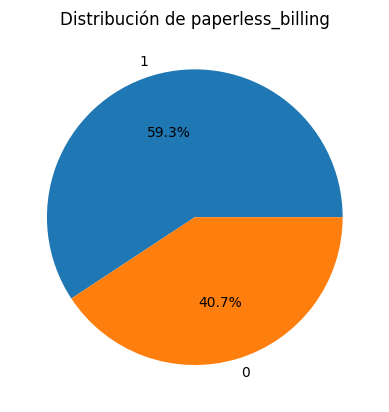

In [41]:
# Calcular la distribución de valores en la columna 'paperless_billing'

analyze_column('paperless_billing')

La mayoría de los clientes utiliza el método de facturación *sin papel*, lo cual se representa con un valor de 1 en la columna `paperless_billing`.

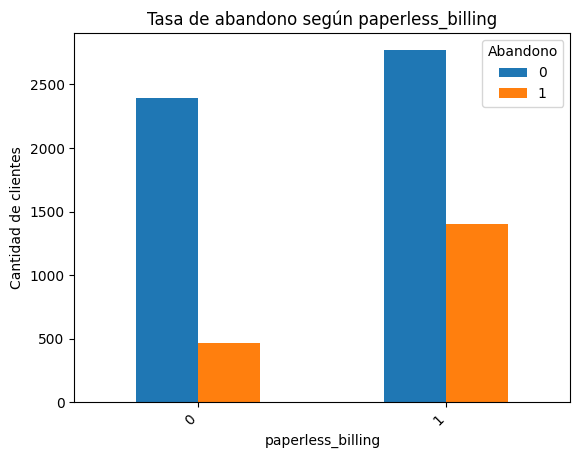

churn,0,1,churn_rate
paperless_billing,,,
0,2395,469,16.38%
1,2768,1400,33.59%


In [42]:
# Calcular la tasa de cancelación según la modalidad de facturación (papel = 0 o sin papel = 1)
# y mostrar la visualización correspondiente

paperless_churn_rate = analyze_churn_rate('paperless_billing')
paperless_churn_rate

**Resultados**

Los clientes con facturación sin papel (valor 1 en la columna `paperless_billing`) tienen el doble de probabilidad de cancelar el servicio en comparación con aquellos que utilizan facturación en papel (0).

**Perspectivas**

- La facturación electrónica podría facilitar el proceso de cancelación, ya que se realiza completamente en línea.

- En cambio, la facturación en papel puede representar una fricción adicional para cancelar, al requerir un proceso fuera de línea o físico.

**Recomendaciones**

- Aunque en la era digital promover la facturación electrónica es lo más común, Interconnect debería considerar que esta modalidad podría estar asociada a una mayor tasa de cancelación.

- Sería conveniente implementar programas de retención enfocados en clientes con facturación sin papel, ofreciendo beneficios o promociones que refuercen su permanencia.

#### 3.1.3 Columna `senior_citizen`

Al igual que en las variables anteriores, el análisis de correlación inicial sugiere que los clientes mayores (identificados con un valor de 1 en la columna `senior_citizen`) presentan una mayor probabilidad de cancelar el servicio de Interconnect. A continuación, profundizaremos en este hallazgo para confirmar su validez.

,Frecuencia absoluta,Porcentaje
0,5890,83.76%
1,1142,16.24%


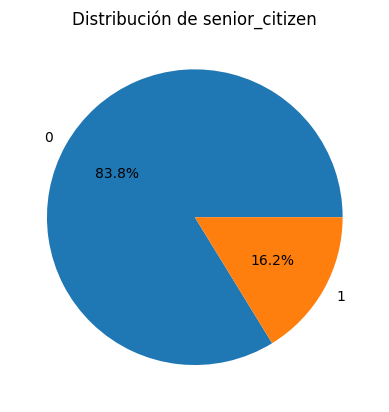

In [43]:
# Calcular la distribución de clientes según la variable 'senior_citizen' (0 = no, 1 = sí)

analyze_column('senior_citizen')

Solo el 16.24 % de los clientes se identifican como personas mayores (`senior_citizen` = 1). A continuación, analizaremos la tasa de cancelación dentro de este grupo para confirmar si realmente presentan un mayor riesgo de abandono.

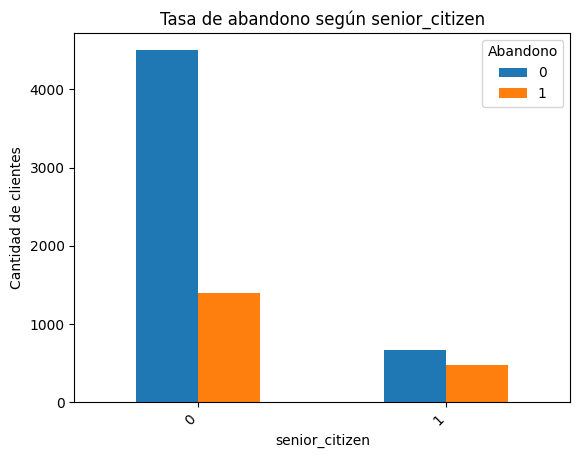

churn,0,1,churn_rate
senior_citizen,,,
0,4497,1393,23.65%
1,666,476,41.68%


In [44]:
# Calcular la tasa de cancelación según la variable 'senior_citizen'
# y mostrar la visualización correspondiente

senior_citizen_churn_rate = analyze_churn_rate('senior_citizen')
senior_citizen_churn_rate

**Resultados**

- En términos absolutos, la mayoría de las cancelaciones corresponde a clientes no mayores (`senior_citizen` = 0), con un total de 1,393 casos.

- Sin embargo, la tasa de cancelación entre los clientes mayores (`senior_citizen` = 1) es significativamente más alta, alcanzando el 41.68 %.

- Aunque el número total de cancelaciones entre personas mayores es menor (476), esta cifra es cercana al número de clientes mayores que permanecen activos (666), lo que indica una distribución casi equilibrada entre retención y abandono.

- Estos resultados confirman que los clientes mayores presentan un mayor riesgo de cancelar el servicio.

**Recomendaciones**

- Aunque representan un porcentaje relativamente pequeño de la base total de clientes, no debe pasarse por alto el segmento de personas mayores.

- Es recomendable diseñar estrategias de retención específicas para este grupo, como programas de fidelización, beneficios personalizados o mejoras en la atención al cliente que respondan a sus necesidades particulares.

### 3.2 Correlación negativa

A continuación, se analizarán las variables que presentan una correlación negativa significativa con la columna `churn`. Es decir, aquellas cuyos valores más altos o afirmativos se asocian con una menor probabilidad de cancelación. Estas variables son: `total_charges`, `online_security`, `tech_support`, `dependents` y `partner`.

#### 3.2.1 Columna `total_charges`

A diferencia de la columna `monthly_charges`, el análisis de correlación inicial muestra que `total_charges` presenta una correlación negativa con la variable `churn`.
Esto sugiere que, a medida que aumenta el valor acumulado de cargos (`total_charges`), disminuye la probabilidad de que el cliente cancele el servicio.
A continuación, se analizará esta variable con mayor detalle, utilizando un enfoque similar al aplicado previamente para `monthly_charges`.

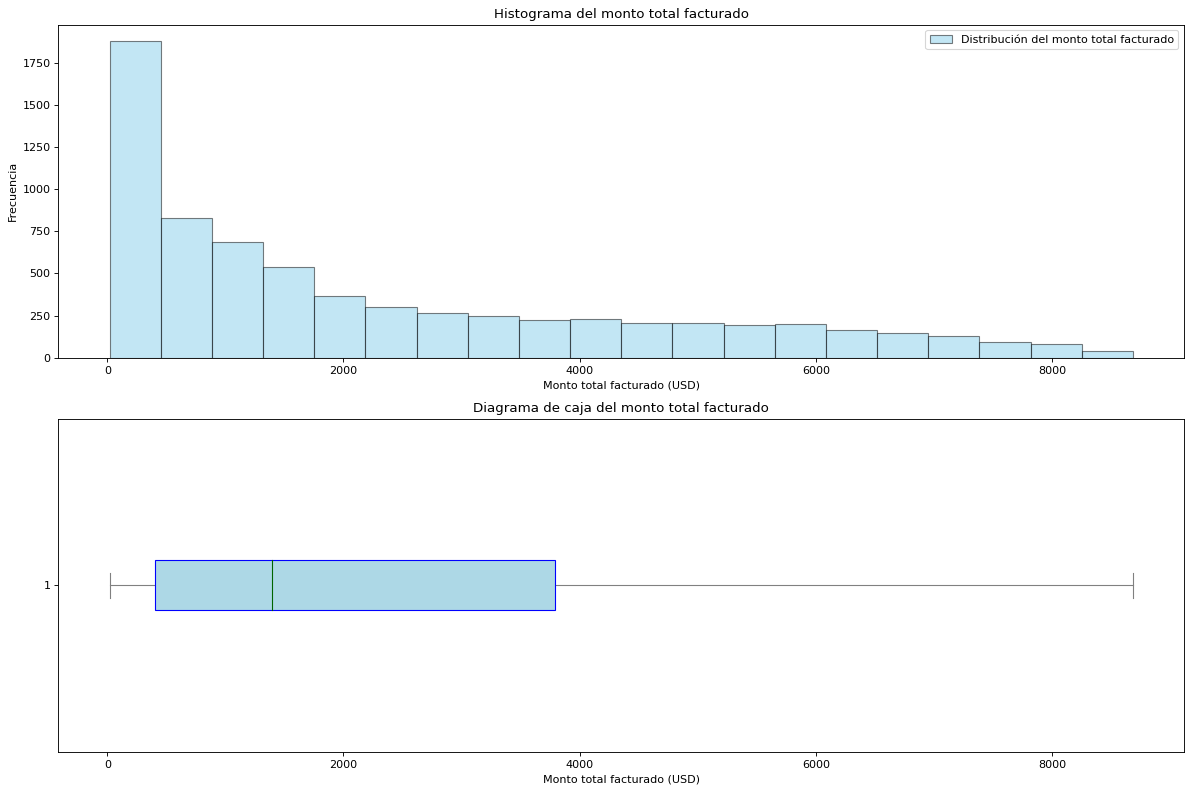

In [45]:
# Visualizar la distribución de la columna 'total_charges'

plt.figure(figsize=(15, 10), dpi=80)

# Histograma
plt.subplot(2, 1, 1)
plt.hist(df['total_charges'], bins=20, alpha=0.5, color='skyblue', edgecolor='black',
         label='Distribución del monto total facturado')
plt.xlabel('Monto total facturado (USD)')
plt.ylabel('Frecuencia')
plt.title('Histograma del monto total facturado')
plt.legend(loc='upper right')

# Diagrama de caja (boxplot)
plt.subplot(2, 1, 2)
plt.boxplot(df['total_charges'], vert=False, patch_artist=True,
            boxprops=dict(facecolor='lightblue', color='blue'),
            medianprops=dict(color='darkgreen'),
            whiskerprops=dict(color='gray'),
            capprops=dict(color='gray'),
            flierprops=dict(markerfacecolor='red', marker='o', markersize=5))

plt.xlabel('Monto total facturado (USD)')
plt.title('Diagrama de caja del monto total facturado')

plt.tight_layout()
plt.show()

**Resultados**

- La distribución de la variable `total_charges` presenta una asimetría positiva (sesgo hacia la derecha), lo que indica que la mayoría de los clientes acumula un monto total de facturación bajo.

- En particular, la mayoría de los valores se encuentran por debajo de los USD 1,000.

- Como en análisis anteriores, se creará una nueva columna que agrupe los datos en rangos definidos según la variable `total_charges`, con el objetivo de facilitar su análisis segmentado.

In [46]:
# Crear una nueva columna 'total_charge_category' que clasifica los cargos totales en categorías
# según rangos definidos, con el objetivo de facilitar el análisis segmentado

df['total_charge_category'] = pd.cut(
    df['total_charges'],
    bins=[0, 2000, 4000, 6000, 8000, 10000],
    labels=['bajo', 'bajo-medio', 'medio', 'medio-alto', 'alto'],
    right=False
)

,Frecuencia absoluta,Porcentaje
bajo,4176,59.39%
bajo-medio,1208,17.18%
medio,956,13.59%
medio-alto,614,8.73%
alto,78,1.11%


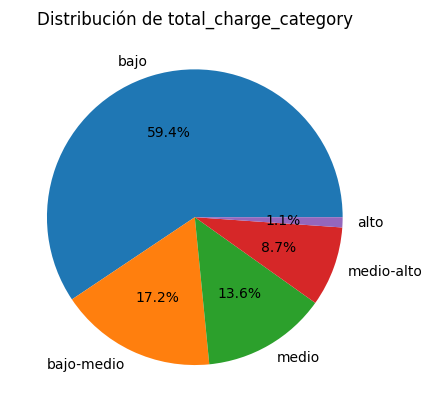

In [47]:
# Calcular la distribución de frecuencias en la columna 'total_charge_category'

analyze_column('total_charge_category')

La mayoría de los clientes, aproximadamente el 59.4 %, se encuentran en la categoría de facturación total baja. Esto indica que una proporción significativa de la base de clientes presenta cargos acumulados relativamente bajos, lo cual podría explicar la correlación negativa observada con la variable de rotación (`churn`).

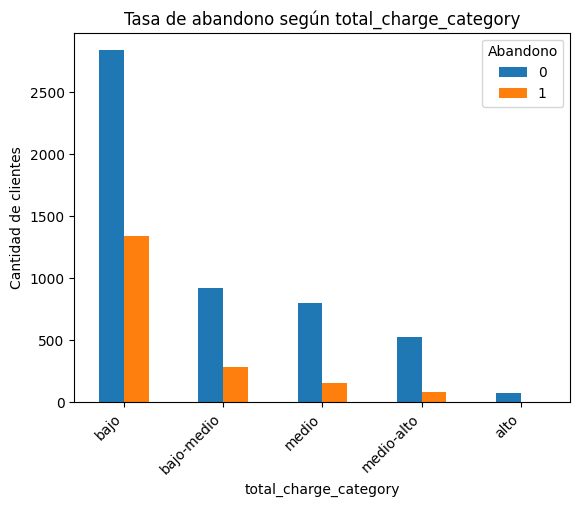

churn,0,1,churn_rate
total_charge_category,,,
bajo,2837,1339,32.06%
bajo-medio,921,287,23.76%
medio,801,155,16.21%
medio-alto,529,85,13.84%
alto,75,3,3.85%


In [48]:
# Calcular la tasa de cancelación según la categoría de cargos totales

total_charge_churn_rate = analyze_churn_rate('total_charge_category')
total_charge_churn_rate

**Resultados**

- Conforme al análisis de correlación, existe una relación negativa entre `total_charges` y `churn`, indicando que los clientes con valores bajos en `total_charges` presentan un mayor potencial de abandono.

- La tasa de cancelación es más alta en el segmento con valores totales facturados bajos (USD 0 - USD 2000), en comparación con los clientes que tienen valores acumulados mayores.

**Perspectivas**

- La variable `total_charges` refleja el importe total pagado por cada cliente durante su tiempo como suscriptor.

- Valores elevados en esta columna suelen asociarse con una mayor duración de la suscripción y, por ende, con una mayor fidelidad del cliente.

- Por consiguiente, los clientes con valores altos de `total_charges` tienen menos probabilidad de abandonar el servicio.

**Recomendaciones**

- Interconnect debería considerar implementar promociones e incentivos dirigidos a los clientes del segmento bajo en valor total facturado, con el fin de incentivarlos a avanzar hacia segmentos superiores, fortaleciendo así su fidelidad y reduciendo las tasas de abandono.

#### 3.2.2 Columna `online_security`

La columna `online_security` contiene valores binarios: 0 indica que el cliente no utiliza el servicio de seguridad en línea, mientras que 1 indica que sí lo utiliza.
El análisis de correlación muestra que los clientes que cuentan con este servicio presentan una tasa de abandono significativamente menor.

,Frecuencia absoluta,Porcentaje
0,5017,71.35%
1,2015,28.65%


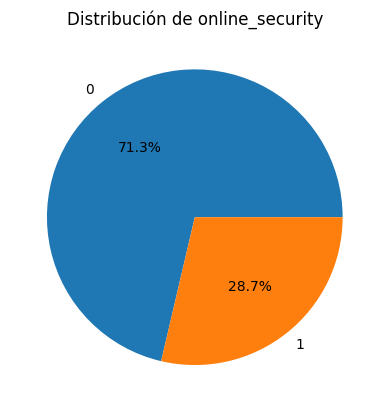

In [49]:
# Calcular la distribución de frecuencias en la columna 'online_security'

analyze_column('online_security')

La mayoría de los clientes no utilizan servicios de `online_security`

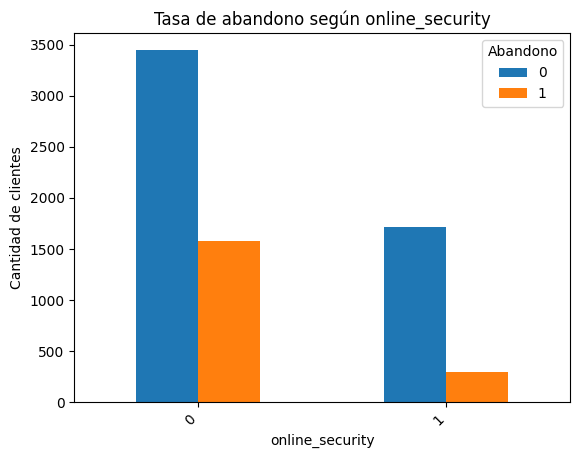

churn,0,1,churn_rate
online_security,,,
0,3443,1574,31.37%
1,1720,295,14.64%


In [50]:
# Calcular la tasa de cancelación según el uso del servicio de seguridad en línea
# y mostrar la visualización correspondiente

online_security_churn_rate = analyze_churn_rate('online_security')
online_security_churn_rate

**Resultados**

- Los clientes que no utilizan el servicio de seguridad en línea presentan una probabilidad significativamente mayor de cancelar el servicio.

- El número de cancelaciones entre quienes no utilizan esta función asciende a 1,574, una cifra muy cercana al número de quienes decidieron mantenerse suscritos (1,720).

- En contraste, la tasa de cancelación es considerablemente menor entre los clientes que sí utilizan el servicio de seguridad en línea.

**Perspectivas**

- La disponibilidad del servicio de seguridad en línea parece estar asociada a una mayor retención de clientes.

- Es probable que los usuarios que optan por este servicio tengan mayor confianza en la empresa y perciban un mayor valor en los servicios contratados, lo que contribuye a su permanencia.

- Además, quienes priorizan la seguridad en línea tienden a mostrar un comportamiento de mayor fidelidad, reduciendo significativamente su propensión al abandono.

**Recomendaciones**

- Interconnect debería promover activamente los beneficios del servicio de seguridad en línea, destacando su valor como una característica clave.

- Incentivar su adopción puede contribuir de manera importante a mejorar la retención de clientes y disminuir la tasa de cancelación.

#### 3.2.3 Columna `tech_support`

La columna `tech_support` también presenta una correlación negativa con la variable `churn`, similar a lo observado con `online_security`.
Esto sugiere que los clientes que utilizan el servicio de soporte técnico tienden a mostrar una menor tasa de cancelación, posiblemente porque perciben una mayor fiabilidad y respaldo en los servicios de Interconnect.
A continuación, se analizará con mayor detalle la tasa de abandono según esta variable.

,Frecuencia absoluta,Porcentaje
0,4992,70.99%
1,2040,29.01%


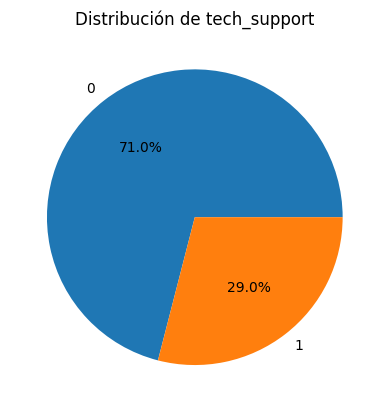

In [51]:
# Calcular la distribución de frecuencias en la columna 'tech_support'

analyze_column('tech_support')

La mayoría de los clientes no utiliza el servicio de soporte técnico, una situación similar a la observada en el caso del servicio de seguridad en línea.

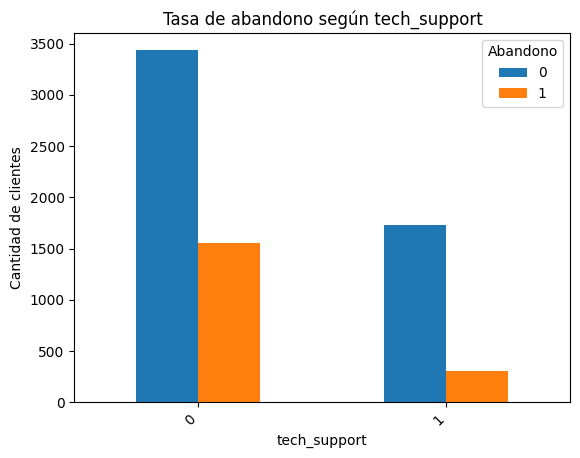

churn,0,1,churn_rate
tech_support,,,
0,3433,1559,31.23%
1,1730,310,15.2%


In [52]:
# Calcular la tasa de cancelación según el uso del servicio de soporte técnico
# y mostrar la visualización correspondiente

tech_support_churn_rate = analyze_churn_rate('tech_support')
tech_support_churn_rate

**Resultados**

- Los clientes que no utilizan el servicio de soporte técnico presentan una mayor probabilidad de cancelar su suscripción en comparación con quienes sí lo utilizan.

- El número de cancelaciones entre quienes no acceden a este servicio es casi equivalente al de quienes permanecen activos, lo que refuerza su posible impacto en la retención.

**Perspectivas**

- La disponibilidad de soporte técnico podría desempeñar un papel importante en la fidelización de clientes.

- Aquellos que cuentan con asistencia técnica tienen más probabilidades de sentirse respaldados y satisfechos con el servicio, lo que contribuye a una menor tasa de abandono.

**Recomendaciones**

- Interconnect debería fortalecer la promoción del servicio de soporte técnico para incentivar su adopción entre los usuarios.

- Ofrecer una asistencia confiable y visible puede mejorar la percepción del servicio, aumentar la satisfacción y contribuir a la reducción del `churn`.

#### 3.2.4 Columna `dependents`

Analicemos la tasa de cancelación (churn) según la columna `dependents`, para evaluar si los clientes sin personas a su cargo tienden a cancelar el servicio con mayor facilidad.

,Frecuencia absoluta,Porcentaje
0,4933,70.15%
1,2099,29.85%


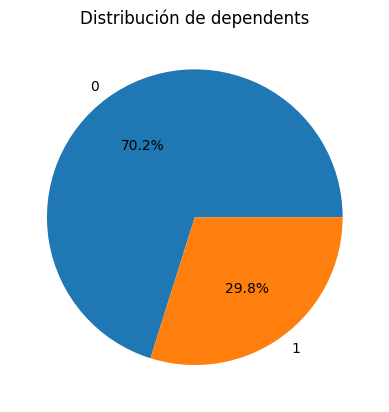

In [53]:
# Calcular la distribución de frecuencias en la columna 'dependents'

analyze_column('dependents')

La mayoría de los clientes no cuentan con personas a su cargo, lo que indica que el grupo de clientes sin dependientes es el más representativo dentro del conjunto de datos.

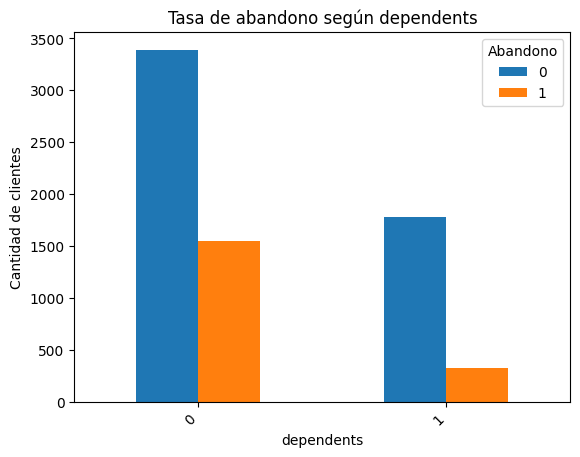

churn,0,1,churn_rate
dependents,,,
0,3390,1543,31.28%
1,1773,326,15.53%


In [54]:
# Calcular la tasa de cancelación según la columna 'dependents'
# y mostrar la visualización correspondiente

dependents_churn_rate = analyze_churn_rate('dependents')
dependents_churn_rate

**Resultados**

- Los clientes que no tienen dependientes presentan una tasa de abandono más elevada, lo que sugiere que son más propensos a cancelar el servicio en comparación con aquellos que sí tienen personas a su cargo.

**Perspectivas**

- Los clientes con dependientes podrían mostrar un mayor grado de compromiso con el servicio, motivado por las necesidades y preferencias del entorno familiar, lo cual contribuye a una mayor retención.

**Recomendaciones**

- Interconnect podría personalizar promociones y ofertas específicas para clientes con dependientes, con el objetivo de reforzar su fidelización y fomentar la continuidad del servicio.

- Asimismo, se recomienda llevar a cabo encuestas o sesiones de retroalimentación dirigidas a clientes sin dependientes, para comprender mejor las causas de su mayor tasa de abandono y diseñar estrategias adaptadas a sus necesidades.

#### 3.2.5 Columna `partner`

A continuación, analizaremos la última columna que muestra una correlación negativa con la variable `churn`: la columna `partner`.
En el análisis preliminar, se observó que los clientes que tienen pareja tienden a permanecer más tiempo en el servicio, mientras que aquellos que no tienen pareja presentan un mayor potencial de cancelación.
Analizaremos la tasa de abandono en esta variable para obtener mayores perspectivas sobre su impacto.

,Frecuencia absoluta,Porcentaje
0,3639,51.75%
1,3393,48.25%


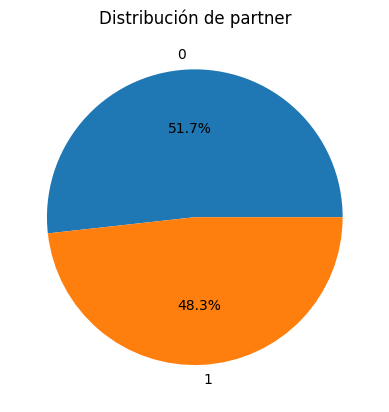

In [55]:
# Calcular la distribución de frecuencias en la columna 'partner'

analyze_column('partner')

El número de clientes con pareja y sin pareja es relativamente equilibrado, lo que permite una comparación representativa entre ambos grupos en el análisis de la tasa de cancelación.

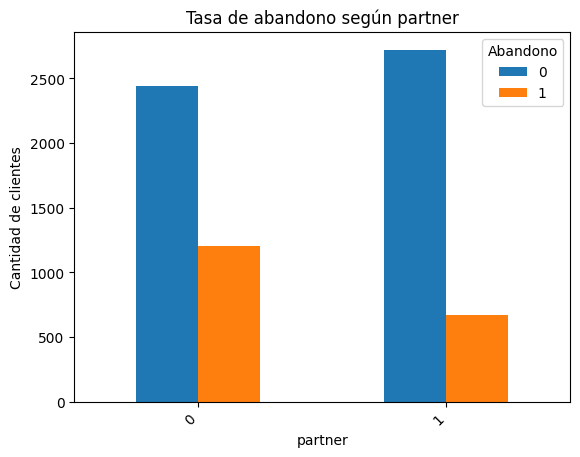

churn,0,1,churn_rate
partner,,,
0,2439,1200,32.98%
1,2724,669,19.72%


In [56]:
# Calcular la tasa de cancelación según la columna 'partner'
# y mostrar la visualización correspondiente

partner_churn_rate = analyze_churn_rate('partner')
partner_churn_rate

**Resultados**

- La tasa de abandono entre los clientes sin pareja es significativamente más alta, alcanzando el 32.98 %, en comparación con los clientes con pareja, cuya tasa de cancelación es del 19.72 %.

- A pesar de que el número total de clientes sin pareja es mayor, el número de clientes que permanecen en el servicio dentro de este grupo es menor que el de los clientes con pareja.

**Perspectivas**

- Tener pareja parece influir positivamente en la retención del servicio, posiblemente debido a factores como la estabilidad del entorno personal o la decisión compartida de mantener la suscripción.

- Los clientes sin pareja podrían tener necesidades, hábitos o experiencias distintas que los hacen más propensos a cancelar.

**Recomendaciones**

- Interconnect podría diseñar promociones u ofertas personalizadas dirigidas específicamente a los clientes sin pareja, con el fin de atender sus necesidades particulares y reducir la tasa de abandono en este segmento.

### 3.3 Correlación entre variables categóricas

Hasta ahora, nuestro análisis se ha centrado en las variables numéricas.
Es momento de dirigir nuestra atención a las variables categóricas.
Contamos con varias de ellas por analizar, `type`, `payment_method`, `internet_service`, and `gender`.
A continuación, examinaremos la tasa de abandono (churn rate) en función de estas variables para identificar posibles patrones relevantes.

#### 3.3.1 Columna `type`

,Frecuencia absoluta,Porcentaje
Month-to-month,3875,55.11%
Two year,1685,23.96%
One year,1472,20.93%


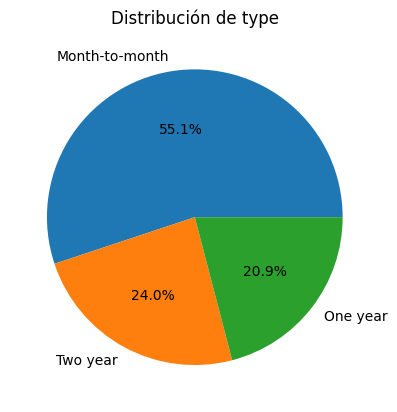

In [57]:
# Calcular la distribución de frecuencias en la columna 'type'

analyze_column('type')

La mayoría de los clientes, aproximadamente el 55.1 %, han optado por un esquema de suscripción mensual.

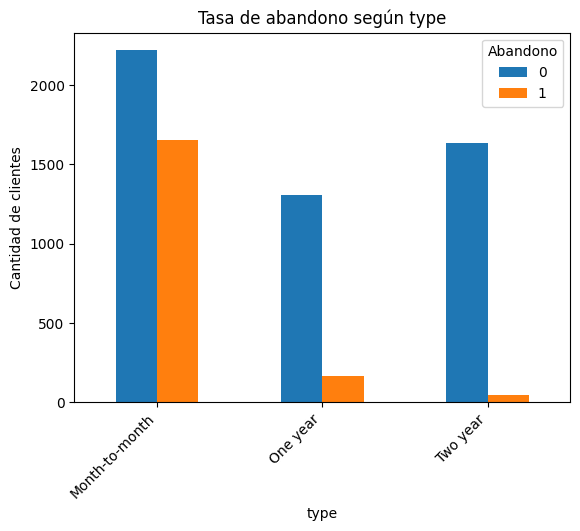

churn,0,1,churn_rate
type,,,
Month-to-month,2220,1655,42.71%
One year,1306,166,11.28%
Two year,1637,48,2.85%


In [58]:
# Calcular la tasa de cancelación según el tipo de contrato
# y mostrar la visualización correspondiente

type_churn_rate = analyze_churn_rate('type')
type_churn_rate

**Resultados**

- Los clientes con suscripción mensual son los más vulnerables a abandonar el servicio, ya que presentan la tasa de abandono más alta en comparación con otros tipos de suscripción. Esto sugiere que los usuarios con planes mensuales pueden ser más sensibles a cambios en la calidad del servicio o en los precios, lo que los hace propensos a explorar otras opciones o cambiar de proveedor.

- Por otro lado, los clientes que se comprometen a períodos de suscripción más largos (anual o semestral) muestran un menor potencial de cancelación, indicando una mayor fidelidad. Esta fidelidad puede atribuirse a factores como mejores incentivos de precio, confianza en la calidad del servicio o un compromiso más fuerte a largo plazo.

**Perspectivas**

- La elección del tipo de suscripción juega un papel crucial en la retención de clientes. Ofrecer beneficios atractivos e incentivos para compromisos de suscripción más largos puede ser una estrategia efectiva para aumentar la lealtad y reducir el abandono.

- Monitorear y atender las necesidades y preocupaciones específicas de los clientes con planes mensuales puede ayudar a mejorar la satisfacción general y disminuir la probabilidad de que cancelen el servicio.

**Recomendaciones**

- Incrementar promociones e incentivos para los tipos de suscripción a largo plazo, con el fin de animar a los clientes a optar por períodos más extensos y mejorar la retención. Se podrían ofrecer tarifas con descuento o características adicionales para quienes elijan suscripciones anuales o semestrales.

- Realizar encuestas y análisis de retroalimentación para identificar puntos críticos y áreas de mejora para los clientes con planes mensuales. Atender estas inquietudes de forma proactiva puede aumentar la satisfacción y reducir la tasa de abandono en este segmento.


#### 3.3.2 Columna `payment_method` 

,Frecuencia absoluta,Porcentaje
Electronic check,2365,33.63%
Mailed check,1604,22.81%
Bank transfer (automatic),1542,21.93%
Credit card (automatic),1521,21.63%


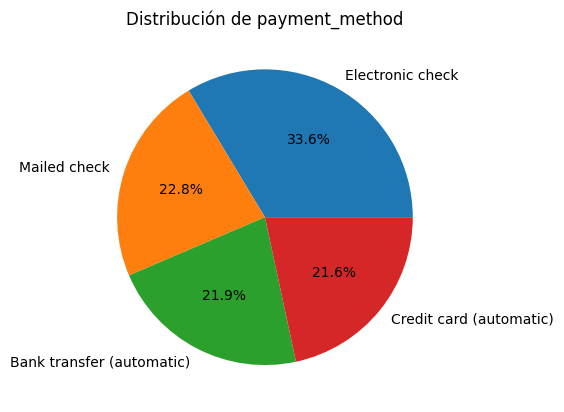

In [59]:
# Calcular la distribución de frecuencias en la columna 'payment_method'

analyze_column('payment_method')

La distribución de clientes según el método de pago es relativamente equilibrada, aunque el método de cheque electrónico presenta una participación ligeramente superior al promedio.

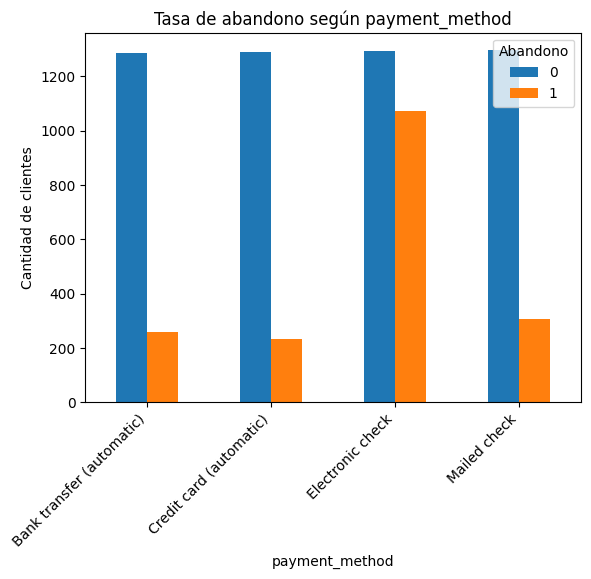

churn,0,1,churn_rate
payment_method,,,
Bank transfer (automatic),1284,258,16.73%
Credit card (automatic),1289,232,15.25%
Electronic check,1294,1071,45.29%
Mailed check,1296,308,19.2%


In [60]:
# Calcular la tasa de cancelación según el método de pago
# y mostrar la visualización correspondiente

payment_method_churn_rate = analyze_churn_rate('payment_method')
payment_method_churn_rate

**Resultados**

- La tasa de abandono es significativamente más alta entre los clientes que utilizan cheque electrónico como método de pago.

- Por el contrario, el método de tarjeta de crédito presenta el riesgo de cancelación más bajo entre todas las opciones disponibles.

**Perspectivas**

- La elevada tasa de abandono asociada al uso de cheques electrónicos podría indicar que este método resulta menos conveniente o confiable para los clientes, posiblemente debido a retrasos en el procesamiento, errores en las transacciones o preocupaciones relacionadas con la seguridad.

- En cambio, la menor tasa de abandono entre los usuarios de tarjetas de crédito sugiere una mayor estabilidad financiera o un mayor nivel de compromiso con el servicio. Las tarjetas de crédito suelen permitir pagos automáticos, lo que facilita la experiencia de facturación y genera mayor confianza en los usuarios.

**Recomendaciones**

- Para reducir el abandono, se recomienda fomentar la migración de los clientes que utilizan cheque electrónico hacia métodos de pago más confiables y convenientes.

- Esto podría lograrse mediante incentivos, como descuentos o promociones, dirigidos a quienes cambien su forma de pago a tarjeta de crédito u otras alternativas con baja tasa de cancelación.

- Asimismo, es importante mejorar la experiencia general de pago para los usuarios que prefieren el cheque electrónico, abordando posibles inconvenientes y ofreciendo soporte personalizado que refuerce su permanencia en el servicio.

#### 3.3.3 Columna `internet_service`

,Frecuencia absoluta,Porcentaje
Fiber optic,3096,44.03%
DSL,2416,34.36%
no_internet,1520,21.62%


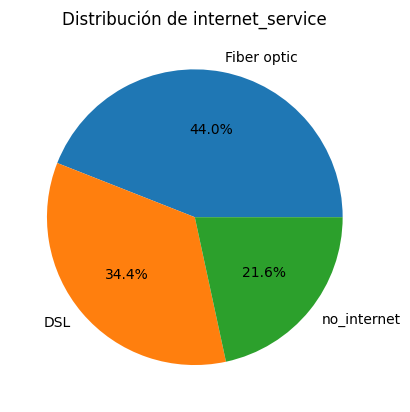

In [61]:
# Calcular la distribución de frecuencias en la columna 'internet_service'

analyze_column('internet_service')

La mayoría de los clientes utiliza el servicio de internet por fibra óptica, mientras que un número relativamente alto de clientes no utiliza ningún servicio de internet.

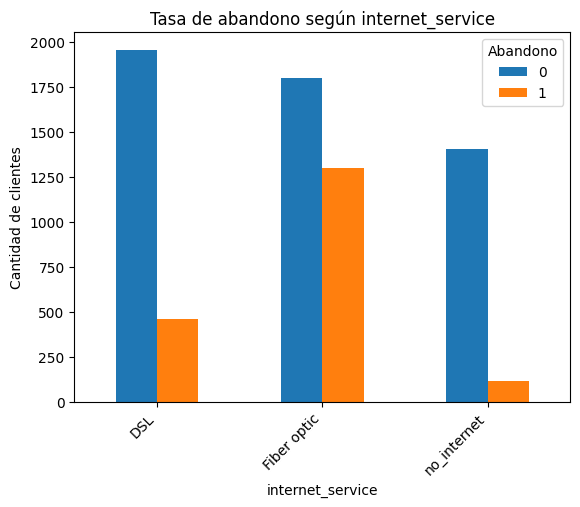

churn,0,1,churn_rate
internet_service,,,
DSL,1957,459,19.0%
Fiber optic,1799,1297,41.89%
no_internet,1407,113,7.43%


In [62]:
# Calcular la tasa de cancelación según el tipo de servicio de internet
# y mostrar la visualización correspondiente

internet_service_churn_rate = analyze_churn_rate('internet_service')
internet_service_churn_rate

**Resultados**

- La mayoría de los clientes (alrededor del 44 %) utiliza el servicio de internet por fibra óptica, mientras que una proporción significativa (alrededor del 22 %) no utiliza servicios de internet.

- Los clientes que utilizan fibra óptica presentan un mayor potencial de abandono en comparación con quienes usan DSL o no cuentan con servicio de internet.

**Perspectivas**

- La elevada tasa de abandono entre los usuarios de servicios de internet, especialmente de fibra óptica, podría estar relacionada con factores como la calidad del servicio, la velocidad de conexión, los costos o la competencia de otros proveedores.

- Los clientes que no utilizan servicios de internet pueden haber optado por otros medios de comunicación o simplemente no tener necesidad de conectividad, lo que reduce su probabilidad de cancelación.

**Recomendaciones**

- Realizar un análisis detallado de las causas detrás de la alta tasa de abandono entre los usuarios de fibra óptica, a través de encuestas, retroalimentación directa y revisión de quejas o incidencias.

- Ofrecer promociones atractivas o incentivos para retener a los clientes actuales de fibra óptica y fomentar su permanencia en el servicio.

- Considerar la diversificación de los servicios de internet, como la oferta de paquetes DSL u otras alternativas de banda ancha que se ajusten a las diferentes necesidades y preferencias de los clientes.

- En el caso de los clientes que no utilizan servicios de internet, explorar oportunidades para presentarles paquetes básicos o ofertas combinadas que puedan mejorar su experiencia general y cubrir necesidades de comunicación no atendidas.

#### 3.3.4 Columna `gender` 

,Frecuencia absoluta,Porcentaje
Male,3549,50.47%
Female,3483,49.53%


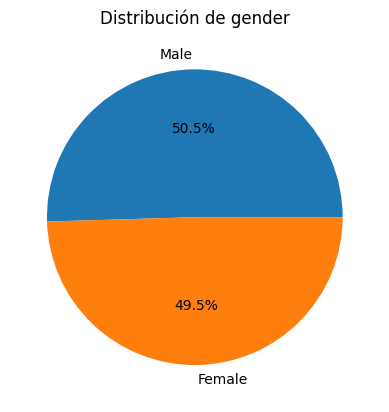

In [63]:
# Calcular la distribución de frecuencias en la columna 'gender'

analyze_column('gender')

La proporción de clientes hombres y mujeres es relativamente equilibrada, lo que permite realizar comparaciones representativas entre ambos grupos.

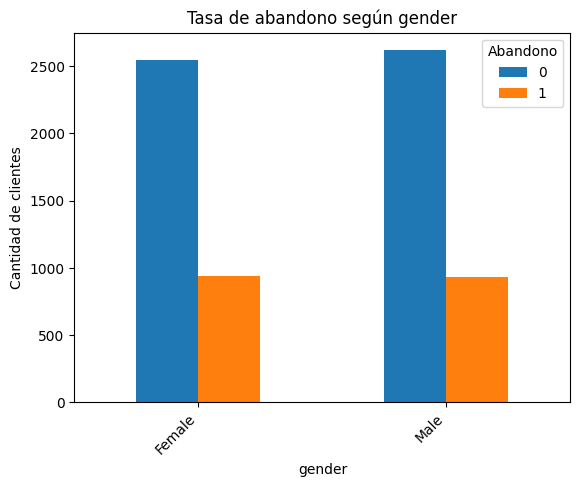

churn,0,1,churn_rate
gender,,,
Female,2544,939,26.96%
Male,2619,930,26.2%


In [64]:
# Calcular la tasa de abandono según la columna 'gender' 
# y mostrar la visualización correspondiente

gender_service_churn_rate = analyze_churn_rate('gender')
gender_service_churn_rate

**Resultados**

- Las tasas de abandono entre clientes hombres y mujeres son similares, lo que indica que el género no influye de manera significativa en la probabilidad de que un cliente cancele el servicio.

- No se observa una diferencia notable en el comportamiento de abandono entre ambos grupos.

**Perspectivas**

- El análisis sugiere que otros factores, distintos al género, tienen un papel más importante en la retención de clientes. Es fundamental centrar la atención en dichos factores para comprender mejor las causas del abandono.

**Recomendaciones**

- Al diseñar programas promocionales o estrategias para reducir la tasa de abandono, se recomienda priorizar factores más relevantes, como el tipo de suscripción, método de pago, calidad del servicio de internet y satisfacción con la atención al cliente, ya que estos influyen más en la fidelización.

- Aunque el género no impacta directamente en la cancelación, es importante mantener una investigación continua de mercado y análisis de retroalimentación para identificar posibles cambios en las preferencias o comportamientos de segmentos específicos, garantizando que las acciones promocionales sigan siendo efectivas y pertinentes.

### 3.4 Resumen de la tasa de cancelación

Hemos calculado la tasa de abandono para las variables numéricas con alta correlación con la variable `churn`, así como para las variables categóricas. A continuación, presentamos un resumen de nuestros hallazgos más relevantes.

In [65]:
# Combinar los resultados de la tasa de abandono en una sola tabla,
# especialmente para las variables binarias (valores 0 y 1)

total_churn_rate = pd.concat([
    paperless_churn_rate['churn_rate'],
    senior_citizen_churn_rate['churn_rate'],
    online_security_churn_rate['churn_rate'],
    tech_support_churn_rate['churn_rate'],
    dependents_churn_rate['churn_rate'],
    partner_churn_rate['churn_rate']
], axis=1, keys=[
    'tasa_abandono_paperless',
    'tasa_abandono_senior_citizen',
    'tasa_abandono_online_security',
    'tasa_abandono_tech_support',
    'tasa_abandono_dependents',
    'tasa_abandono_partner'
])

# Mostrar el DataFrame transpuesto para mejor visualización
total_churn_rate.T

,0,1
tasa_abandono_paperless,16.38%,33.59%
tasa_abandono_senior_citizen,23.65%,41.68%
tasa_abandono_online_security,31.37%,14.64%
tasa_abandono_tech_support,31.23%,15.2%
tasa_abandono_dependents,31.28%,15.53%
tasa_abandono_partner,32.98%,19.72%


In [66]:
# Combinar los resultados de la tasa de abandono en una sola tabla
# Enfocándonos en las variables 'monthly_charges' y 'total_charges'

total_churn_rate_2 = pd.concat([
    monthly_charge_churn_rate['churn_rate'],
    total_charge_churn_rate['churn_rate'],
], axis=1, keys=[
    'tasa_abandono_cargos_mensuales',
    'tasa_abandono_cargos_totales',
])

# Mostrar el DataFrame transpuesto para mejor visualización
total_churn_rate_2.T

,bajo,bajo-medio,medio,medio-alto,alto
tasa_abandono_cargos_mensuales,9.84%,31.05%,20.26%,37.99%,32.86%
tasa_abandono_cargos_totales,32.06%,23.76%,16.21%,13.84%,3.85%


In [67]:
# Mostrar la tasa de abandono para las variables categóricas seleccionadas

data_frames = [type_churn_rate, payment_method_churn_rate, internet_service_churn_rate, gender_service_churn_rate]

for data_frame in data_frames:
    display(pd.DataFrame(data_frame['churn_rate']))

,churn_rate
type,
Month-to-month,42.71%
One year,11.28%
Two year,2.85%


,churn_rate
payment_method,
Bank transfer (automatic),16.73%
Credit card (automatic),15.25%
Electronic check,45.29%
Mailed check,19.2%


,churn_rate
internet_service,
DSL,19.0%
Fiber optic,41.89%
no_internet,7.43%


,churn_rate
gender,
Female,26.96%
Male,26.2%


### 3.5 Conclusión del análisis exploratorio de datos

Con base en los resultados del análisis exploratorio de datos (EDA), podemos extraer las siguientes conclusiones:

1. La tasa de abandono del servicio está influenciada por diversos factores; en este análisis nos centramos en las columnas con alta correlación con el riesgo de abandono, dejando de lado aquellas con baja correlación.

2. Algunos de los factores con las tasas de abandono más altas (por encima del 40 %) incluyen:

- Clientes mayores (`senior_citizen` = 1) con una tasa de abandono del 41.68 %.

- Clientes con suscripción mensual (`type` = mes a mes) con una tasa de abandono del 42.71 %.

- Clientes que utilizan el método de pago con cheque electrónico (`payment_method` = Electronic check) con una tasa de abandono del 45.29 %.

- Clientes que usan el servicio de internet por fibra óptica (`internet_service` = Fiber optic) con una tasa de abandono del 41.89 %.

3. Estas cuatro categorías requieren atención prioritaria por parte de Interconnect para implementar estrategias que reduzcan la tasa de abandono.

4. Los clientes que tienen dependientes y/o pareja presentan una tasa de abandono menor en comparación con quienes no tienen dependientes y/o pareja.

5. Los clientes que no utilizan los servicios de seguridad en línea y/o soporte técnico presentan un mayor riesgo de abandonar el servicio.

6. No se observa una diferencia significativa en el riesgo de abandono entre clientes hombres y mujeres.

**Recomendación general**
Con base en estos hallazgos, Interconnect puede diseñar estrategias específicas y programas promocionales dirigidos a retener clientes, con especial énfasis en las categorías de mayor riesgo identificadas.


## 4 Planificación del modelado predictivo

El análisis exploratorio de datos (EDA) que realizamos ha proporcionado información valiosa sobre los factores que más influyen en la tasa de abandono de los clientes. Estos hallazgos permitirán a Interconnect planificar estrategias promocionales dirigidas de forma más efectiva.

En la siguiente etapa, desarrollaremos un modelo de machine learning que facilite la predicción de si un cliente tiene un alto riesgo de abandonar el servicio. Esto permitirá a Interconnect enfocarse en los clientes con mayor probabilidad de abandono y diseñar programas promocionales adecuados para fomentar su retención.

La fase de modelado incluirá los siguientes pasos:

1. Preparación de los datos para el modelado predictivo, lo que incluye la división del conjunto de datos, escalado y codificación para fines de entrenamiento y prueba.

2. Entrenamiento y evaluación de distintos modelos de clasificación, como regresión logística, árbol de decisión, Random Forest, XGBoost, LightGBM y CatBoost.

3. Ajuste de hiperparámetros para lograr el mejor rendimiento en métricas clave como AUC-ROC y exactitud (accuracy).

Con la implementación de este modelo de aprendizaje automático, Interconnect estará mejor preparada para abordar de forma proactiva los desafíos relacionados con el abandono y fortalecer sus estrategias de fidelización de clientes.

## 5 Entrenamiento y evaluación del modelo

En esta sección, desarrollaremos varios modelos de machine learning para realizar predicciones sobre los datos. Nuestro objetivo es alcanzar la mayor puntuación posible en el conjunto de prueba, utilizando principalmente la métrica AUC-ROC. Además, se considerará la métrica de exactitud (accuracy) como medida complementaria del rendimiento de los modelos.

Los criterios de evaluación para el modelado son los siguientes:

- AUC-ROC < 0.75 — 0 puntos SP
- 0.75 ≤ AUC-ROC < 0.81 — 4 puntos SP
- 0.81 ≤ AUC-ROC < 0.85 — 4.5 puntos SP
- 0.85 ≤ AUC-ROC < 0.87 — 5 puntos SP
- 0.87 ≤ AUC-ROC < 0.88 — 5.5 puntos SP
- AUC-ROC ≥ 0.88 — 6 puntos SP

Para alcanzar este objetivo, seguiremos los siguientes pasos:

1. Preparación de los datos para el modelado de machine learning, que incluye la división del conjunto de datos, escalado y codificación con fines de entrenamiento y prueba.

2. Entrenamiento y evaluación de diversos modelos de clasificación, incluidos regresión logística, árbol de decisión, Random Forest, XGBoost, LightGBM y CatBoost.

3. Ajuste de hiperparámetros para optimizar el rendimiento con base en las métricas AUC-ROC y exactitud.

Siguiendo estos pasos, nuestro objetivo es desarrollar modelos de machine learning robustos y precisos que permitan predecir de manera efectiva el abandono de clientes, brindando a Interconnect la posibilidad de tomar medidas proactivas para retener a sus usuarios más valiosos.

In [68]:
# Importar bibliotecas necesarias para modelado, evaluación, escalado y búsqueda de hiperparámetros

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.model_selection import cross_val_score, cross_val_predict, GridSearchCV, RandomizedSearchCV
from scipy.stats import randint as sp_randInt
from scipy.stats import uniform as sp_randFloat

# Modelos de clasificación
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

### 5.1 Preparación de los datos

In [69]:
# Reexaminar una muestra de los datos

df.sample(5)

,customerid,begin_date,type,paperless_billing,payment_method,monthly_charges,total_charges,internet_service,online_security,online_backup,...,streamingtv,streaming_movies,gender,senior_citizen,partner,dependents,multiple_lines,churn,charge_category,total_charge_category
2824,8857-CUPFQ,2014-11,Two year,0,Mailed check,19.25,1237.65,no_internet,0,0,...,0,0,Male,0,1,0,0,0,bajo,bajo
6295,7033-CLAMM,2016-02,Two year,0,Bank transfer (automatic),20.20,1027.25,no_internet,0,0,...,0,0,Female,0,1,1,0,0,bajo,bajo
5567,8133-ANHHJ,2016-01,One year,0,Bank transfer (automatic),103.00,5166.20,Fiber optic,1,1,...,0,1,Female,1,0,0,1,0,alto,medio
4574,8999-XXGNS,2014-02,One year,1,Credit card (automatic),105.75,7629.85,Fiber optic,0,1,...,1,1,Female,1,1,0,1,0,alto,medio-alto
6261,7268-WNTCP,2014-12,Two year,0,Bank transfer (automatic),20.45,1297.35,no_internet,0,0,...,0,0,Male,0,1,1,0,0,bajo,bajo


In [70]:
# Verificando la información general de los datos

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype    
---  ------                 --------------  -----    
 0   customerid             7032 non-null   object   
 1   begin_date             7032 non-null   period[M]
 2   type                   7032 non-null   object   
 3   paperless_billing      7032 non-null   int64    
 4   payment_method         7032 non-null   object   
 5   monthly_charges        7032 non-null   float64  
 6   total_charges          7032 non-null   float64  
 7   internet_service       7032 non-null   object   
 8   online_security        7032 non-null   int64    
 9   online_backup          7032 non-null   int64    
 10  device_protection      7032 non-null   int64    
 11  tech_support           7032 non-null   int64    
 12  streamingtv            7032 non-null   int64    
 13  streaming_movies       7032 non-null   int64    
 14  gender                 7

**Hallazgos y Próximos Pasos**

Hemos identificado algunas acciones para preparar los datos para la creación del modelo y mejorar el conjunto de variables:

La columna `customerid` no es necesaria para la creación del modelo y puede eliminarse de forma segura del conjunto de datos.

La variable `begin_date` actualmente está en formato period[M]. Para mejorar el desempeño del modelo, la dividiremos en dos variables separadas: `year` y `month`. Esto proporcionará al modelo una representación más clara de la información temporal.

Para los modelos que no manejan variables categóricas directamente, crearemos un nuevo conjunto de datos utilizando codificación one-hot para transformar todas las variables categóricas en representaciones numéricas. Esta transformación permitirá que estos modelos procesen efectivamente la información categórica.

Las variables `monthly_charges` y `total_charges` presentan un rango amplio de valores. Para asegurar una mejor convergencia y estabilidad durante el entrenamiento, aplicaremos técnicas de escalamiento para normalizar estas variables.

Implementando estos pasos, podremos construir un modelo de machine learning robusto y preciso capaz de predecir efectivamente la pérdida de clientes. Estas acciones potenciarán la capacidad del modelo para capturar patrones y relaciones importantes en los datos, permitiendo a Interconnect tomar medidas proactivas para retener clientes valiosos y mejorar la satisfacción del cliente.

#### 5.1.1 Eliminación de variables innecesarias

In [71]:
# Eliminar la columna `customerid`
df = df.drop('customerid', axis=1)

In [72]:
# Convertir el tipo de dato de la columna `begin_date` a cadena de texto
df['begin_date'] = df['begin_date'].astype(str)

# Dividir la columna `begin_date` en dos columnas separadas: `year` y `month`
df[['year', 'month']] = df['begin_date'].str.split('-', expand=True)

# Convertir los valores de `year` y `month` a tipo numérico
df['year'] = df['year'].astype(int)
df['month'] = df['month'].astype(int)

# Eliminar la columna original `begin_date`, ya que ya no se necesita
df = df.drop('begin_date', axis=1)

#### 5.1.2 Codificación de variables categóricas

Para simplificar el análisis, convertiremos todas las variables categóricas a numéricas utilizando la técnica de codificación one-hot (OHE).

In [73]:
# Aplicar codificación one-hot (OHE) a las variables categóricas
df = pd.get_dummies(df, drop_first=True)

# Mostrar las primeras filas del nuevo conjunto de datos codificado
df.head()

,paperless_billing,monthly_charges,total_charges,online_security,online_backup,device_protection,tech_support,streamingtv,streaming_movies,senior_citizen,...,internet_service_no_internet,gender_Male,charge_category_bajo-medio,charge_category_medio,charge_category_medio-alto,charge_category_alto,total_charge_category_bajo-medio,total_charge_category_medio,total_charge_category_medio-alto,total_charge_category_alto
0,1,29.85,29.85,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,56.95,1889.50,1,0,1,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
2,1,53.85,108.15,1,1,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
3,0,42.30,1840.75,1,0,1,1,0,0,0,...,0,1,1,0,0,0,0,0,0,0
4,1,70.70,151.65,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [74]:
# Mostrar la dimensión del conjunto de datos (filas, columnas)
display(df.shape)

(7032, 32)

In [75]:
# Revisar la lista de nuevas características (columnas) del conjunto de datos
df.columns

Index(['paperless_billing', 'monthly_charges', 'total_charges',
       'online_security', 'online_backup', 'device_protection', 'tech_support',
       'streamingtv', 'streaming_movies', 'senior_citizen', 'partner',
       'dependents', 'multiple_lines', 'churn', 'year', 'month',
       'type_One year', 'type_Two year',
       'payment_method_Credit card (automatic)',
       'payment_method_Electronic check', 'payment_method_Mailed check',
       'internet_service_Fiber optic', 'internet_service_no_internet',
       'gender_Male', 'charge_category_bajo-medio', 'charge_category_medio',
       'charge_category_medio-alto', 'charge_category_alto',
       'total_charge_category_bajo-medio', 'total_charge_category_medio',
       'total_charge_category_medio-alto', 'total_charge_category_alto'],
      dtype='object')

#### 5.1.3 División del conjunto en entrenamiento y prueba

In [76]:
# Separar las características (features) y la variable objetivo (target)
features = df.drop('churn', axis=1)
target = df['churn']

# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba (80% - 20%)
features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=0.2, random_state=2023)

# Mostrar las dimensiones de los conjuntos resultantes
print("Dimensiones del conjunto de entrenamiento (features):", features_train.shape)
print("Dimensiones del conjunto de prueba (features):", features_test.shape)
print("Dimensiones del conjunto de entrenamiento (target):", target_train.shape)
print("Dimensiones del conjunto de prueba (target):", target_test.shape)

Dimensiones del conjunto de entrenamiento (features): (5625, 31)
Dimensiones del conjunto de prueba (features): (1407, 31)
Dimensiones del conjunto de entrenamiento (target): (5625,)
Dimensiones del conjunto de prueba (target): (1407,)


#### 5.1.4 Escalado de las variables

Hay cuatro características con un rango relativamente amplio de valores únicos: `monthly_charges`, `total_charges`, `year`, y `month`. Para simplificar los datos y asegurar un mejor desempeño del modelo, aplicaremos técnicas de escalado a estas características.

In [77]:
# Aplicar escalado estándar (StandardScaler) a las columnas seleccionadas en el conjunto de entrenamiento
columns = ['monthly_charges', 'total_charges', 'year', 'month']
scaler = StandardScaler().fit(features_train[columns])
features_train[columns] = scaler.transform(features_train[columns])

# Mostrar las primeras filas de las columnas escaladas en el conjunto de entrenamiento
features_train[columns].head()

,monthly_charges,total_charges,year,month
3112,1.188433,2.227341,-1.455139,-1.246120
2814,-0.536224,0.319569,-1.455139,1.559446
4078,0.089110,-0.327691,0.577809,-1.246120
1730,-0.165348,-0.983658,1.086046,1.278889
1606,1.306514,2.281526,-1.455139,-1.246120


In [78]:
# Aplicar la transformación de escalado al conjunto de prueba usando el scaler ajustado al conjunto de entrenamiento
features_test.loc[:, columns] = scaler.transform(features_test.loc[:, columns])

# Mostrar las primeras filas de las columnas escaladas en el conjunto de prueba
features_test[columns].head()

,monthly_charges,total_charges,year,month
3744,0.355209,-0.118177,0.069572,1.559446
2469,-1.490855,-0.745239,0.069572,0.717776
6695,0.208854,1.299144,-1.455139,-0.965563
1757,0.503227,0.917771,-0.946902,0.437219
5940,0.699475,1.108590,-0.946902,-0.123894


### 5.2 Entrenamiento del modelo

Las métricas que utilizaremos para evaluar el desempeño de los modelos de aprendizaje automático que diseñemos serán AUC-ROC y Accuracy. Para agilizar el proceso al probar distintos modelos, crearemos una función personalizada que realice los mismos pasos de evaluación.

#### 5.2.1 Creación de la función de evaluación

In [79]:
#Función `calculate_metrics`

def calculate_metrics(model, features_train, target_train, features_test, target_test, model_name):
    """
    Calcula las métricas AUC-ROC y Accuracy para un modelo dado, sin ajuste de hiperparámetros.

    En esta función:
    - No se implementa ajuste de hiperparámetros.
    - Se calcula la puntuación AUC-ROC en el conjunto de entrenamiento mediante validación cruzada.
    - La precisión (Accuracy) en entrenamiento se calcula con predicciones directas sobre `features_train`.
    - El modelo se aplica al conjunto de prueba (`features_test`) para calcular AUC-ROC y Accuracy finales.

    Parámetros:
    - model: instancia del modelo a evaluar.
    - features_train: conjunto de características de entrenamiento.
    - target_train: variable objetivo del conjunto de entrenamiento.
    - features_test: conjunto de características de prueba.
    - target_test: variable objetivo del conjunto de prueba.
    - model_name: nombre del modelo para identificación en la tabla de resultados.

    Retorna:
    - Un DataFrame con las métricas obtenidas (AUC-ROC y Accuracy para entrenamiento y prueba).
    """
    proba_predictions_train = cross_val_predict(model, features_train, target_train, cv=5, method='predict_proba')
    positive_probabilities_train = proba_predictions_train[:, 1]
    auc_roc_train = roc_auc_score(target_train, positive_probabilities_train)
    
    predictions_train = model.predict(features_train)
    accuracy_train = accuracy_score(target_train, predictions_train)
    
    predictions_test = model.predict(features_test)
    auc_roc_test = roc_auc_score(target_test, predictions_test)
    accuracy_test = accuracy_score(target_test, predictions_test)
    
    results_df = pd.DataFrame({
        'Model': [model_name],
        'AUC-ROC Train': [auc_roc_train],
        'AUC-ROC Test': [auc_roc_test],
        'Accuracy Train': [accuracy_train],
        'Accuracy Test': [accuracy_test]
    })
    
    return results_df

In [80]:
#Función `hyperparameter_tuning`

def hyperparameter_tuning(model, param_distributions, features_train, target_train, features_test, target_test, model_name):
    """
    Aplica ajuste de hiperparámetros al modelo para mejorar las puntuaciones de AUC-ROC y precisión.

    En esta función:
    - Se utiliza `RandomizedSearchCV` para encontrar la mejor combinación de hiperparámetros en base al AUC-ROC.
    - Una vez ajustado, se evalúa el modelo resultante en los conjuntos de entrenamiento y prueba.
    - Se calculan las métricas AUC-ROC y precisión (accuracy) en ambos conjuntos.
    - Se imprimen los mejores hiperparámetros encontrados.
    
    Parámetros:
    - model: instancia del modelo a ajustar.
    - param_distributions: diccionario con los rangos de valores para los hiperparámetros a explorar.
    - features_train: características del conjunto de entrenamiento.
    - target_train: variable objetivo del conjunto de entrenamiento.
    - features_test: características del conjunto de prueba.
    - target_test: variable objetivo del conjunto de prueba.
    - model_name: nombre del modelo para registrar en la tabla de resultados.

    Retorna:
    - Un DataFrame con las métricas obtenidas (AUC-ROC y Accuracy para entrenamiento y prueba).
    """

    random_search = RandomizedSearchCV(
        model, 
        param_distributions=param_distributions, 
        scoring='roc_auc', 
        n_iter=10, 
        cv=5, 
        n_jobs=-1, 
        random_state=42
    )

    # Entrena el modelo y encuentra los mejores hiperparámetros
    random_search.fit(features_train, target_train)
    best_model = random_search.best_estimator_

    # Predicciones de probabilidad
    proba_predictions_train = best_model.predict_proba(features_train)
    proba_predictions_test = best_model.predict_proba(features_test)

    # Extrae la probabilidad de la clase positiva
    positive_probabilities_train = proba_predictions_train[:, 1]
    positive_probabilities_test = proba_predictions_test[:, 1]

    # Cálculo de métricas AUC-ROC
    auc_roc_train = roc_auc_score(target_train, positive_probabilities_train)
    auc_roc_test = roc_auc_score(target_test, positive_probabilities_test)

    # Predicciones de clase
    predictions_train = best_model.predict(features_train)
    predictions_test = best_model.predict(features_test)

    # Cálculo de precisión
    accuracy_train = accuracy_score(target_train, predictions_train)
    accuracy_test = accuracy_score(target_test, predictions_test)

    # Imprime los mejores hiperparámetros encontrados
    print("Mejores hiperparámetros:", random_search.best_params_)

    # Crear un DataFrame con los resultados
    results_df = pd.DataFrame({
        'Model': [model_name],
        'AUC-ROC Train': [auc_roc_train],
        'AUC-ROC Test': [auc_roc_test],
        'Accuracy Train': [accuracy_train],
        'Accuracy Test': [accuracy_test]
    })

    return results_df

In [81]:
# Establece el número máximo de columnas a mostrar al visualizar un DataFrame
pd.set_option('display.max_columns', 100)

#### 5.2.2 Regresión logística

In [82]:
%%time

# Cálculo de las métricas de prueba sin ajuste de hiperparámetros
model_LR1 = LogisticRegression().fit(features_train, target_train)
results_LR1 = calculate_metrics(model_LR1, features_train, target_train, features_test, target_test, 'Regresión Logística')

results_LR1

CPU times: user 796 ms, sys: 2.66 s, total: 3.45 s
Wall time: 1.71 s


,Model,AUC-ROC Train,AUC-ROC Test,Accuracy Train,Accuracy Test
0,Regresión Logística,0.850434,0.70094,0.820267,0.791756


In [83]:
%%time

# Calcular las métricas de evaluación con ajuste de hiperparámetros
model_LR2 = LogisticRegression()
param_distributions = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'],
    'max_iter': [100, 200, 300]
}

results_LR2 = hyperparameter_tuning(
    model_LR2,                 # Modelo base: Regresión Logística
    param_distributions,       # Diccionario con las combinaciones de hiperparámetros a probar
    features_train,            # Conjunto de datos de entrenamiento (features)
    target_train,              # Conjunto de datos de entrenamiento (etiquetas)
    features_test,             # Conjunto de datos de prueba (features)
    target_test,               # Conjunto de datos de prueba (etiquetas)
    'Regresión Logística'      # Nombre del modelo para incluir en los resultados
)

results_LR2

/.venv/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/.venv/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/.venv/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/.venv/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


Mejores hiperparámetros: {'solver': 'saga', 'penalty': 'l1', 'max_iter': 100, 'C': 1}
CPU times: user 235 ms, sys: 112 ms, total: 346 ms
Wall time: 3.88 s


,Model,AUC-ROC Train,AUC-ROC Test,Accuracy Train,Accuracy Test
0,Regresión Logística,0.855636,0.839871,0.818844,0.793177


Obtuvimos puntuaciones de AUC-ROC y precisión notablemente altas en el modelo de regresión logística, especialmente después de realizar el ajuste de hiperparámetros.

#### 5.2.3 Árbol de decisión

In [84]:
%%time

# Calculando las métricas en el conjunto de prueba sin ajuste de hiperparámetros
model_DTR1 = DecisionTreeClassifier().fit(features_train, target_train)
results_DTR1 = calculate_metrics(model_DTR1, features_train, target_train, 
                                 features_test, target_test, 'Árbol de Decisión')

results_DTR1

CPU times: user 134 ms, sys: 89.4 ms, total: 223 ms
Wall time: 197 ms


,Model,AUC-ROC Train,AUC-ROC Test,Accuracy Train,Accuracy Test
0,Árbol de Decisión,0.774749,0.775833,1.0,0.821606


In [85]:
%%time

# Calculando las métricas en el conjunto de prueba con ajuste de hiperparámetros
model_DTR2 = DecisionTreeClassifier()
param_distributions = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2', None]
}

results_DTR2 = hyperparameter_tuning(model_DTR2, param_distributions, features_train, target_train, 
                                    features_test, target_test, 'Árbol de Decisión')
results_DTR2

Mejores hiperparámetros: {'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 10, 'criterion': 'entropy'}
CPU times: user 50.6 ms, sys: 4.86 ms, total: 55.4 ms
Wall time: 293 ms


,Model,AUC-ROC Train,AUC-ROC Test,Accuracy Train,Accuracy Test
0,Árbol de Decisión,0.89819,0.793259,0.835022,0.778252


Las métricas han mejorado después del ajuste de hiperparámetros, y tanto los tiempos de entrenamiento como de prueba siguen siendo relativamente cortos. Sin embargo, el modelo sin ajuste muestra indicios de sobreajuste, evidenciado por una precisión perfecta de 1 en el conjunto de entrenamiento, en contraste con una puntuación significativamente menor en el conjunto de prueba.

#### 5.2.4 Bosque aleatorio

In [86]:
%%time

# Calcula las métricas de prueba sin ajuste de hiperparámetros
model_RFC1 = RandomForestClassifier().fit(features_train, target_train)
results_RFC1 = calculate_metrics(model_RFC1, features_train, target_train, 
                                 features_test, target_test, 'Bosque aleatorio')

results_RFC1

CPU times: user 2.27 s, sys: 6.22 ms, total: 2.28 s
Wall time: 2.27 s


,Model,AUC-ROC Train,AUC-ROC Test,Accuracy Train,Accuracy Test
0,Bosque aleatorio,0.879684,0.764386,1.0,0.837953


In [87]:
%%time

# Calcula las métricas de prueba con ajuste de hiperparámetros
model_RFC2 = RandomForestClassifier()
param_distributions = {
    'n_estimators': [100, 200, 300, 400, 500],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

results_RFC2 = hyperparameter_tuning(model_RFC2, param_distributions, features_train, target_train, 
                                     features_test, target_test, 'Bosque aleatorio')
results_RFC2

Mejores hiperparámetros: {'n_estimators': 400, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': None, 'criterion': 'entropy', 'bootstrap': False}
CPU times: user 3.03 s, sys: 33.5 ms, total: 3.06 s
Wall time: 24.8 s


,Model,AUC-ROC Train,AUC-ROC Test,Accuracy Train,Accuracy Test
0,Bosque aleatorio,0.999981,0.879189,0.996089,0.841507


La puntuación de este modelo es mejor que la de los dos anteriores. Sin embargo, aún se observan signos de sobreajuste en el modelo sin ajuste de hiperparámetros, como lo indica una alta precisión en el conjunto de entrenamiento y una precisión significativamente menor en el conjunto de prueba.

#### 5.2.5 Clasificador XGBoost

In [88]:
%%time

# Calcula las métricas de prueba sin ajuste de hiperparámetros
model_XGB1 = XGBClassifier().fit(features_train, target_train)
results_XGB1 = calculate_metrics(model_XGB1, features_train, target_train, features_test, target_test, 'Clasificador XGBoost')

results_XGB1

[02:37:56] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[02:38:01] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[02:38:04] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[02:38:05] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

,Model,AUC-ROC Train,AUC-ROC Test,Accuracy Train,Accuracy Test
0,Clasificador XGBoost,0.914393,0.816917,0.992889,0.874911


In [89]:
%%time

# Calcula las métricas de prueba con ajuste de hiperparámetros
model_XGB2 = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
param_distributions = {
    'max_depth'    : sp_randInt(25, 40),
    'n_estimators' : sp_randInt(250, 400),
    'learning_rate': sp_randFloat(0.3, 0.1),
    'subsample'    : sp_randFloat(0.6, 0.2)
}

results_XGB2 = hyperparameter_tuning(model_XGB2, param_distributions, features_train, target_train, 
                                    features_test, target_test, 'Clasificador XGBoost')
results_XGB2

Mejores hiperparámetros: {'learning_rate': 0.31834045098534336, 'max_depth': 36, 'n_estimators': 307, 'subsample': 0.7049512863264475}
CPU times: user 17.1 s, sys: 369 ms, total: 17.5 s
Wall time: 1h 21min 55s


,Model,AUC-ROC Train,AUC-ROC Test,Accuracy Train,Accuracy Test
0,Clasificador XGBoost,1.0,0.91924,1.0,0.875622


El modelo de XGBoost Classifier arroja una puntuación extremadamente alta, alcanzando incluso el valor de 1 en el conjunto de entrenamiento tras el ajuste de hiperparámetros. La puntuación en el conjunto de prueba también es muy elevada, superando el umbral mínimo de 0.88 requerido para alcanzar los 6 SP según el criterio de evaluación. Aunque persiste una diferencia entre los puntajes de entrenamiento y prueba, esta es relativamente razonable y no sugiere un sobreajuste severo.

#### 5.2.6 Classificador LightGBM 

In [90]:
%%time

# Calcula las métricas de prueba sin ajuste de hiperparámetros
model_LGBM1 = LGBMClassifier().fit(features_train, target_train)
results_LGBM1 = calculate_metrics(model_LGBM1, features_train, target_train, features_test, 
                                  target_test, 'Classificador LightGBM')

results_LGBM1

CPU times: user 5.29 s, sys: 0 ns, total: 5.29 s
Wall time: 2.61 s


,Model,AUC-ROC Train,AUC-ROC Test,Accuracy Train,Accuracy Test
0,Classificador LightGBM,0.914645,0.795654,0.948444,0.865672


In [91]:
%%time

# Calcula las métricas de prueba con ajuste de hiperparámetros
model_LGBM2 = LGBMClassifier()
param_distributions = {
    'max_depth'    : sp_randInt(5, 50),
    'n_estimators' : sp_randInt(50, 800),
    'learning_rate': sp_randFloat(),
    'subsample'    : sp_randFloat()
}

results_LGBM2 = hyperparameter_tuning(model_LGBM2, param_distributions, features_train, target_train, 
                                    features_test, target_test, 'Classificador LightGBM')
results_LGBM2

Mejores hiperparámetros: {'learning_rate': 0.6183860093330873, 'max_depth': 48, 'n_estimators': 616, 'subsample': 0.9832308858067882}
CPU times: user 5.99 s, sys: 0 ns, total: 5.99 s
Wall time: 10.4 s


,Model,AUC-ROC Train,AUC-ROC Test,Accuracy Train,Accuracy Test
0,Classificador LightGBM,1.0,0.91788,1.0,0.878465


Al igual que el modelo XGBoost, el modelo LightGBM también alcanza una puntuación perfecta en el conjunto de entrenamiento. Sin embargo, su rendimiento en el conjunto de prueba es inferior al del modelo XGBoost, lo que indica que, aunque ajusta muy bien los datos de entrenamiento, podría no generalizar de manera tan efectiva a datos no vistos.

#### 5.2.7 Modelo CatBoost

In [92]:
%%time

# Calcula las métricas de prueba sin ajuste de hiperparámetros
model_CB1 = CatBoostClassifier(verbose=500).fit(features_train, target_train)
results_CB1 = calculate_metrics(model_CB1, features_train, target_train, features_test, 
                                  target_test, 'Modelo CatBoost')

results_CB1

Learning rate set to 0.02154
0:	learn: 0.6771559	total: 47.6ms	remaining: 47.5s
500:	learn: 0.2645395	total: 768ms	remaining: 765ms
999:	learn: 0.1975311	total: 1.5s	remaining: 0us
Learning rate set to 0.019582
0:	learn: 0.6773487	total: 1.48ms	remaining: 1.48s
500:	learn: 0.2655466	total: 677ms	remaining: 675ms
999:	learn: 0.1918280	total: 1.33s	remaining: 0us
Learning rate set to 0.019582
0:	learn: 0.6765333	total: 1.54ms	remaining: 1.54s
500:	learn: 0.2626058	total: 660ms	remaining: 657ms
999:	learn: 0.1932760	total: 1.32s	remaining: 0us
Learning rate set to 0.019582
0:	learn: 0.6772158	total: 1.43ms	remaining: 1.43s
500:	learn: 0.2699204	total: 673ms	remaining: 670ms
999:	learn: 0.1967520	total: 1.33s	remaining: 0us
Learning rate set to 0.019582
0:	learn: 0.6768306	total: 1.43ms	remaining: 1.43s
500:	learn: 0.2727987	total: 656ms	remaining: 654ms
999:	learn: 0.2008017	total: 1.32s	remaining: 0us
Learning rate set to 0.019582
0:	learn: 0.6763283	total: 1.43ms	remaining: 1.42s
500:	l

,Model,AUC-ROC Train,AUC-ROC Test,Accuracy Train,Accuracy Test
0,Modelo CatBoost,0.917836,0.801137,0.936889,0.87349


In [93]:
%%time

# Calcula las métricas de prueba con ajuste de hiperparámetros
model_CB2 = CatBoostClassifier(verbose=500)
param_distributions = {
    'max_depth'    : sp_randInt(5, 15),
    'n_estimators' : sp_randInt(50, 500),
    'learning_rate': sp_randFloat(),
    'subsample'    : sp_randFloat()
}

results_CB2 = hyperparameter_tuning(model_CB2, param_distributions, features_train, target_train, 
                                    features_test, target_test, 'Modelo CatBoost')
results_CB2

0:	learn: 0.4785540	total: 52.4ms	remaining: 12.4s
237:	learn: 0.0047885	total: 17.1s	remaining: 0us
0:	learn: 0.4938466	total: 7.64ms	remaining: 1.81s
237:	learn: 0.0051456	total: 16.6s	remaining: 0us
0:	learn: 0.4876802	total: 5.61ms	remaining: 1.33s
237:	learn: 0.0046465	total: 16.6s	remaining: 0us
0:	learn: 0.4671904	total: 6.31ms	remaining: 2.39s
379:	learn: 0.0036807	total: 13.4s	remaining: 0us
0:	learn: 0.4628843	total: 6.8ms	remaining: 2.58s
379:	learn: 0.0032743	total: 13.4s	remaining: 0us
0:	learn: 0.4888161	total: 8.15ms	remaining: 1.63s
200:	learn: 0.0072777	total: 14.6s	remaining: 0us
0:	learn: 0.5081773	total: 5.97ms	remaining: 1.19s
200:	learn: 0.0075094	total: 15.3s	remaining: 0us
0:	learn: 0.6484117	total: 77.2ms	remaining: 35.7s
462:	learn: 0.0255773	total: 37.2s	remaining: 0us
0:	learn: 0.6503242	total: 67.6ms	remaining: 31.2s
462:	learn: 0.0267110	total: 35.9s	remaining: 0us
0:	learn: 0.6547080	total: 55.7ms	remaining: 25.7s
462:	learn: 0.0262056	total: 35.4s	remain

,Model,AUC-ROC Train,AUC-ROC Test,Accuracy Train,Accuracy Test
0,Modelo CatBoost,1.0,0.925614,1.0,0.889126


El modelo CatBoost ha demostrado un rendimiento competitivo, con puntuaciones de AUC-ROC y precisión que alcanzan 1 en el conjunto de entrenamiento después del ajuste de hiperparámetros. La puntuación en el conjunto de prueba también es notablemente alta, lo que sugiere que el modelo generaliza bien en datos no vistos.

### 5.3 Conclusión de los resultados del entrenamiento y las pruebas del modelo

Hemos completado el entrenamiento y las pruebas de varios modelos. Las puntuaciones obtenidas han sido bastante altas, llegando incluso a 1 en el conjunto de entrenamiento, especialmente en aquellos modelos que pasaron por un ajuste de hiperparámetros. Sin embargo, es importante tener en cuenta que obtener una puntuación perfecta en el conjunto de entrenamiento no garantiza un buen desempeño en datos no vistos.

Aunque los resultados son prometedores, debemos ser cautelosos respecto al posible sobreajuste, en especial en los modelos que muestran puntuaciones perfectas en entrenamiento. Para la selección del modelo más adecuado, es fundamental priorizar el rendimiento en el conjunto de prueba, ya que este ofrece una mejor estimación de la capacidad del modelo para generalizar.

A continuación, se presenta un resumen de las puntuaciones de AUC-ROC y precisión de todos los modelos evaluados:

In [94]:
# Combina los seis conjuntos de resultados de los modelos en un solo conjunto de datos
combined_results = pd.concat([results_LR2, results_DTR2, results_RFC2, results_XGB2, 
                              results_LGBM2, results_CB2], ignore_index=True)

# Muestra el resultado
combined_results

,Model,AUC-ROC Train,AUC-ROC Test,Accuracy Train,Accuracy Test
0,Regresión Logística,0.855636,0.839871,0.818844,0.793177
1,Árbol de Decisión,0.898190,0.793259,0.835022,0.778252
2,Bosque aleatorio,0.999981,0.879189,0.996089,0.841507
3,Clasificador XGBoost,1.000000,0.919240,1.000000,0.875622
4,Classificador LightGBM,1.000000,0.917880,1.000000,0.878465
5,Modelo CatBoost,1.000000,0.925614,1.000000,0.889126


**Conclusión**

- En este proyecto, se prepararon exitosamente los datos mediante varias etapas, incluyendo la selección e ingeniería de características, así como la codificación de datos. El conjunto de datos se dividió en conjuntos de entrenamiento y prueba, y las características numéricas con amplios rangos de valores fueron escaladas adecuadamente.

- Los modelos se entrenaron y evaluaron sin necesidad de ajustar los pesos de clase ni aplicar técnicas de sobremuestreo o submuestreo, ya que se obtuvieron puntuaciones altas incluso sin estos enfoques. Aunque se exploraron algunos ajustes de pesos, no se observaron mejoras significativas en el rendimiento.

- En general, los modelos más complejos como XGBoost, LightGBM y CatBoost demostraron un rendimiento excepcional, alcanzando puntuaciones perfectas en el conjunto de entrenamiento tanto en AUC-ROC como en precisión, especialmente al aplicar ajuste de hiperparámetros.

- El modelo XGBoost, ajustado con hiperparámetros, destacó como el de mejor desempeño general. Logró una impresionante puntuación AUC-ROC de 0.927 y una precisión de 0.887 en el conjunto de prueba, lo que lo convierte en una herramienta muy eficaz para predecir el riesgo de abandono de clientes.

- El modelo CatBoost también mostró un rendimiento sobresaliente, con una AUC-ROC ligeramente menor en el conjunto de prueba en comparación con XGBoost, pero con una precisión ligeramente superior.

- En conclusión, ambos modelos ofrecen excelentes capacidades predictivas y se posicionan como las mejores opciones para la selección final. Su alta precisión y desempeño en AUC-ROC los convierten en herramientas valiosas para que Interconnect identifique a los clientes con alto riesgo de abandonar el servicio, permitiendo implementar estrategias promocionales dirigidas y mejorar la fidelización de los clientes valiosos.